

click stream data



In [ ]:
https://github.com/mrunmayeeshukla/Clickstream-analysis-data-formatting

maps for click stream

In [ ]:
https://towardsdatascience.com/introduction-to-graph-models-for-clickstream-data-c2bc44da90bb

sequence rule for click stream pattern minning

In [ ]:
http://what-when-how.com/Tutorial/topic-1467n11e3em/Advances-in-Data-Mining-7.html

introduction to markov modulated markpoint process

In [ ]:
https://github.com/tobhatt/M3PP

process to json files

In [ ]:
https://support.unpaywall.org/support/solutions/articles/44001867300-how-do-i-read-jsonl-files-

Source of the Data set About the Data sets

Source of Data  Iranian Web site 
Link - https://zanbil.online/product-category/home-appliances

In [ ]:
https://www.kaggle.com/datasets/eliasdabbas/web-server-access-logs

"C:\Users\SAPTARSHI BHATTACHAR\Desktop\access.csv"

Context
Web sever logs contain information on any event that was registered/logged. This contains a lot of insights on website visitors, behavior, crawlers accessing the site, business insights, security issues, and more.

This is a dataset for trying to gain insights from such a file.

Content
3.3GB of logs from an Iranian ecommerce website zanbil.ir.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from datetime import datetime

In [2]:
import os

Data ingestion and Preliminiary cleanning

Define a clean_text function:

This function takes a text input as an argument and cleans it using regular expressions.
It checks if the input is a string using isinstance(text, str) and then applies specific cleaning logic using regular expressions.
In this case, the cleaning logic is to remove the "+330" from the datetime string.
The cleaned text is returned with leading and trailing whitespaces stripped.

Define regular expressions:

common_regex and combined_regex are regular expressions defined as raw strings. These patterns are used to match and extract specific information from text data, like log files. They include named capturing groups (e.g., (?P<userid>\S+)) to capture specific pieces of information (e.g., user ID, datetime, method, etc.) from log entries.

In [3]:
import re
import pandas as pd

common_regex = r'^(?P<userid>\S+) \[(?P<datetime>[^\]]+)\] "(?P<method>[A-Z]+) (?P<request>[^ "]+)? HTTP/[0-9.]+" (?P<status>[0-9]{3}) (?P<size>[0-9]+|-)'
combined_regex = r'^(?P<client>\S+) \S+ (?P<userid>\S+) \[(?P<datetime>[^\]]+)\] "(?P<method>[A-Z]+) (?P<request>[^ "]+)? HTTP/[0-9.]+" (?P<status>[0-9]{3}) (?P<size>[0-9]+|-) "(?P<referrer>[^"]*)" "(?P<useragent>[^"]*)"'

columns = ['client', 'userid', 'datetime', 'method', 'request', 'status', 'size', 'referer', 'user_agent']

def clean_text(text):
    # Add your cleaning logic here using regular expressions
    if isinstance(text, str):
        # Remove +330 from datetime
        cleaned_text = re.sub(r' \+\d{4}', '', text)
        return cleaned_text.strip()
    return text


# Read the CSV file into a DataFrame
df = pd.read_csv("C:\\Users\\SAPTARSHI BHATTACHAR\\Desktop\\access.csv")

# Apply cleaning using regular expressions to the specified columns
for col in columns:
    df[col] = df[col].apply(clean_text)

# Display the first few rows of the cleaned DataFrame
df.head(3)


,client,userid,datetime,method,request,status,size,referer,user_agent
0,37.152.163.59,-,22/Jan/2019:12:38:27,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-7.j...,200,1105,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
1,37.152.163.59,-,22/Jan/2019:12:38:27,GET,/static/images/zanbil-kharid.png,200,358,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
2,85.9.73.119,-,22/Jan/2019:12:38:27,GET,/static/images/next.png,200,3045,https://znbl.ir/static/bundle-bundle_site_head...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...



client: This column represents the IP address of the client or user who made the HTTP request. It indicates the source of the request.

userid: This column appears to be empty or missing data. It might have been intended to capture user IDs, but in this dataset, it doesn't contain any meaningful information.

datetime: This column contains the date and time when the HTTP request was made. The format appears to be in the form of "day/month/year:hour:minute:second."

method: This column specifies the HTTP request method used, such as GET. The HTTP method describes the action to be performed on the specified resource.

request: This column contains the specific resource or URL that was requested by the client. It includes information like the path and query parameters.

status: This column represents the HTTP response status code returned by the server. A status code of 200 typically indicates a successful request, while others may indicate errors or redirects.

size: This column indicates the size of the HTTP response in bytes. It represents the size of the data transferred from the server to the client as part of the response.

referer: This column contains the URL of the referring page or the page that linked to the requested resource. It provides information about how the user arrived at the current page.

user_agent: This column contains the user agent string, which typically represents the web browser or client application used by the user to make the request. It can provide insights into the type of device and browser being used.

**Summary of dataset**
1. **Client**: This column represents the IP address of the user or device that made the HTTP request to the website.

2. **Datetime**: This column records the datetime when the clickstream event occurred.

3. **Method**: It includes the request method (e.g., GET).

4. **Request**: This column contains the details of the HTTP request made by the user or device. It includes the URL path (e.g., /filter/27|13%20%D9%85%DA%AF%D8%A7%D9%...).

5. **Status**: This column indicates the HTTP response status code that the server returned in response to the request. For example, a "200" status code typically indicates a successful response.

6. **Size**: This column represents the size of the HTTP response in terms of bytes.

7. **Referer**: This column contains the address or URL of the website or specific page that was accessed.

8. **User_agent**: This column provides details about the user's browser, such as its user-agent string, which can include information about the browser type, version, and platform.

From this dataset, we can perform various types of clickstream analysis to gain insights into user behavior, website performance, and more:

- **Path Analysis**: By analyzing the sequence of URLs visited, you can identify common navigation paths users take through the website.

- **Referral Analysis**: You can determine where the traffic is coming from by examining the "Site_address" column and segment users based on referral sources.

- **Page Views and Engagement**: Calculate metrics like the number of page views, average response size, and engagement time to understand how users interact with the site.

- **Browser and Device Analysis**: Utilize the "Browser_details" column to analyze the distribution of browsers and devices used by visitors.

- **Time-based Patterns**: Analyze user behavior over different dates and times to identify patterns in site usage.

In [17]:
df.shape

(10000, 9)

DataSet Related information

In [5]:
df.userid.value_counts()

-    10000
Name: userid, dtype: int64

In [6]:
df.method.value_counts()

GET        9777
POST        182
HEAD         38
OPTIONS       3
Name: method, dtype: int64

**HTTP** Method	Purpose	Typical Use Cases	Example

**GET**	:Request data from a resource	Fetching web content	Browsing a webpage by entering a URL

**POST** 	:Submit data for processing	Form submissions, data upload, server-side changes	Submitting a login form or uploading a file

**HEAD**:	Request only resource headers	Gather metadata without content	Checking file size or last modification date

**OPTIONS** :	Inquire about available communication options	Checking supported methods and options	Cross-origin requests or understanding resource ops

**CONNECT**:	Establish a network connection	Proxy tunneling, HTTPS via proxy	Used for network infrastructure, not regular browsing

**PROPFIND**:	Request properties of a resource	Querying metadata and properties	Retrieving file author, creation date, or metadata


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['client'] == client]['method'] for client in df['client']], labels=df['client'].unique())
plt.xlabel('Client')
plt.ylabel('Method')
plt.title('Distribution of HTTP Methods by Client')
plt.show()

About the data

In [7]:
df.request.value_counts()

/settings/logo                                                                                                                                                                    297
/site/alexaGooleAnalitic                                                                                                                                                          145
/static/css/font/wyekan/font.woff                                                                                                                                                  74
/static/images/guarantees/bestPrice.png                                                                                                                                            66
/favicon.ico                                                                                                                                                                       66
                                                                                          

In [8]:
df.status.value_counts()

status
200    9631
302     172
404      73
304      62
301      34
499      28
Name: count, dtype: int64

**200**: Success - The request was successful, and the server has returned the requested data. (9579824 occurrences)

**304**: Not Modified - Indicates that the resource has not been modified since the last request, so it's still cached by the client. (340228 occurrences)

**302**: Found (Temporary Redirect) - The requested resource has been temporarily moved to a different URL. (199835 occurrences)

**404**: Not Found - The requested resource could not be found on the server. (105011 occurrences)

**301:** Moved Permanently - The requested resource has been permanently moved to a different URL. (67552 occurrences)

**499:** Client Closed Request - The client closed the connection before the server could respond. (50852 occurrences)

**500**: Internal Server Error - The server encountered an internal error while processing the request. (14266 occurrences)

**403**: Forbidden - The client does not have permission to access the requested resource. (5634 occurrences)

**502:** Bad Gateway - Indicates that a server acting as a gateway or proxy received an invalid response from an upstream server. (798 occurrences)

401: Unauthorized - Authentication is required, and the provided credentials are not valid. (323 occurrences)

**400**: Bad Request - The request is malformed or invalid. (318 occurrences)

**408**: Request Timeout - The client's request took too long to complete, and the server timed out waiting for it. (112 occurrences)

504: Gateway Timeout - The server acting as a gateway or proxy did not receive a timely response from an upstream server. (103 occurrences)

**405**: Method Not Allowed - The HTTP method used in the request is not allowed for the requested resource. (6 occurrences)

**206:** Partial Content - Indicates that the server is returning a partial representation of the resource. (The count is missing; it's usually used for ranged requests where only a portion of the resource is requested.)

In [9]:
df.referer.value_counts()

referer
-                                                                                                                                                                                                                            836
https://www.zanbil.ir/browse/home-appliances/%D9%84%D9%88%D8%A7%D8%B2%D9%85-%D8%AE%D8%A7%D9%86%DA%AF%DB%8C                                                                                                                   661
https://www.zanbil.ir/                                                                                                                                                                                                       534
https://znbl.ir/static/bundle-bundle_site_head.css                                                                                                                                                                           506
https://www.zanbil.ir/browse/refrigerator-and-freezer/%DB%8C%D8%AE%DA%86%D8%A7%D9%84-%D9%81%

In [63]:
df.client.nunique()   #unique user count

258445

In [11]:
df.isnull().sum()

client        0
userid        0
datetime      0
method        0
request       0
status        0
size          0
referer       0
user_agent    0
dtype: int64

Data Cleaning: Removing values where on  special characters  are present

In [42]:
# Drop rows where either 'request' or 'referer' column has the value '/'
fdf = df[(df['request'] != '/') ] #  & (df['referer'] != '/')]
# Display the filtered DataFrame
fdf.head(1)

,client,userid,datetime,method,request,status,size,referer,user_agent
0,37.152.163.59,-,22/Jan/2019:12:38:27,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-7.j...,200,1105,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....


In [43]:
# Drop rows where either 'request' or 'referer' column has the value '/'
dk = fdf[(fdf['request'] != '-')]   # & (fdf['referer'] != '-')]
# Display the filtered DataFrame
dk.head(1)

,client,userid,datetime,method,request,status,size,referer,user_agent
0,37.152.163.59,-,22/Jan/2019:12:38:27,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-7.j...,200,1105,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....


Dropped  Null values from the data frame

In [44]:
df1 = dk.dropna(axis=0)
df1.head(2)

,client,userid,datetime,method,request,status,size,referer,user_agent
0,37.152.163.59,-,22/Jan/2019:12:38:27,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-7.j...,200,1105,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
1,37.152.163.59,-,22/Jan/2019:12:38:27,GET,/static/images/zanbil-kharid.png,200,358,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....


Drpped columns userid, method, status, size, user_agent. Most of the values in the user id column having  - signs. which is not possible only two values are present . so i dropped user id column. and approaching using client Ip. Our business objective do not require method,status, size, user_agent columns   

In [45]:
columns_to_drop = ['userid','method','status','size','user_agent']
df2 = df1.drop(columns=columns_to_drop)
df2.tail(2)

,client,datetime,request,referer
10364863,5.125.254.169,26/Jan/2019:16:01:31,/image/1/brand,https://www.zanbil.ir/m/filter/p62%2Cstexists
10364864,65.49.68.192,26/Jan/2019:16:01:31,/image/56698/productModel/150x150,https://www.zanbil.ir/browse/audio-and-video-e...


Changed data type

In [46]:
df2['datetime'] = pd.to_datetime(df2['datetime'],format='%d/%b/%Y:%H:%M:%S')
#df['method'] = df['method'].astype('category')
df2['request'] = df2['request'].astype('str')
df2['referer'] = df2['referer'].astype('category')
#df['user_agent'] = df['user_agent'].astype('category')

df2['datetime'].dt: The .dt accessor is used to apply datetime-related operations to the 'datetime' column. This allows you to work with the datetime elements of the column.

.strftime('%d/%b/%Y:%H:%M:%S'): This part of the code uses the strftime method to format the datetime values in the 'datetime' column according to the specified format string:

%d: Day of the month (01, 02, ..., 31)
%b: Abbreviated month name (Jan, Feb, ..., Dec)
%Y: Year with century as a decimal number (e.g., 2023)
%H: Hour (00, 01, ..., 23)
%M: Minute (00, 01, ..., 59)
%S: Second (00, 01, ..., 59)

In [47]:
df2['datetime'] = df2['datetime'].dt.strftime('%d/%b/%Y:%H:%M:%S')

In [48]:
df2['datetime'] = pd.to_datetime(df2['datetime'],format='%d/%b/%Y:%H:%M:%S')

In [49]:
# Filter out rows where 'request' column contains '.css' or '.js'
df2 = df2[~df2['request'].str.contains('\.css|\.js')]

In [50]:
df3 = df2.sort_values(by=['client','datetime'], axis=0, ascending=True)
df3.head(2)

,client,datetime,request,referer
8968867,1.132.107.223,2019-01-26 02:26:22,/m/article/616/%D8%B9%D9%84%D8%AA-%D8%AE%D9%88...,https://www.google.com/
8968872,1.132.107.223,2019-01-26 02:26:23,/settings/logo,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...


Estimating Time difference :It is actually the difference of two logs. Here in this case the data set having information about date and time when the person is loggining Each pages ,which means the time of click.The time of clicking activty as timestamp. datetime is a timestamp.time difference of one click to another click is the time difference.

In [13]:
df3.shape

(10100615, 4)

In [14]:
df3.isnull().sum()

client      0
datetime    0
request     0
referer     0
dtype: int64

In [16]:
df3.client.value_counts()

66.249.66.194      353332
66.249.66.91       314418
66.249.66.92        88306
151.239.241.163     82093
104.222.32.91       41610
                    ...  
2.185.163.30            1
5.119.196.182           1
5.119.196.199           1
5.119.196.253           1
2.190.127.128           1
Name: client, Length: 257846, dtype: int64

In [17]:
# Get unique values in a specific column
unique_values = df3['client'].unique()
# Print the unique values
print(unique_values)

['1.132.107.223' '1.132.108.133' '1.136.111.52' ... '99.246.247.185'
 '99.253.184.236' '99.99.188.195']


Creating client base data sets

It takes input as client Ip ans shows the activity of clients

In [51]:
# User-defined function to get client data
def get_client_data(data_frame, target_client):
    client_df = data_frame[data_frame['client'] == target_client].copy()
    return client_df

# User input for target client
user_input = input("Enter the client ID: ")

# Get data for the target client using the user-defined function
client_data = get_client_data(df3, user_input)
# Print the data for the target client
cd=client_data
cd.head(3)

,client,datetime,request,referer
2114873,66.249.66.194,2019-01-22 03:56:18,"/filter/b41,b665,c150%7C%D8%A8%D8%AE%D8%A7%D8%...",-
2114884,66.249.66.194,2019-01-22 03:56:20,"/m/filter/b2,p6",-
2114896,66.249.66.194,2019-01-22 03:56:22,/m/browse/gas-heater/%D8%A8%D8%AE%D8%A7%D8%B1%...,-


sorted the datatime in chronological order

In [52]:
# Convert the 'datetime' column to a datetime data type
cd['datetime'] = pd.to_datetime(cd['datetime'], format='%d/%b/%Y:%H:%M:%S')
# Sort the DataFrame by the 'datetime' column in ascending order
cd_sorted = cd.sort_values(by='datetime')
# Display the sorted DataFrame
cd_sorted.head(3)

,client,datetime,request,referer
2114873,66.249.66.194,2019-01-22 03:56:18,"/filter/b41,b665,c150%7C%D8%A8%D8%AE%D8%A7%D8%...",-
2114884,66.249.66.194,2019-01-22 03:56:20,"/m/filter/b2,p6",-
2114896,66.249.66.194,2019-01-22 03:56:22,/m/browse/gas-heater/%D8%A8%D8%AE%D8%A7%D8%B1%...,-


In [53]:
df5=cd_sorted

In [54]:
df5.head(5)

,client,datetime,request,referer
2114873,66.249.66.194,2019-01-22 03:56:18,"/filter/b41,b665,c150%7C%D8%A8%D8%AE%D8%A7%D8%...",-
2114884,66.249.66.194,2019-01-22 03:56:20,"/m/filter/b2,p6",-
2114896,66.249.66.194,2019-01-22 03:56:22,/m/browse/gas-heater/%D8%A8%D8%AE%D8%A7%D8%B1%...,-
2114897,66.249.66.194,2019-01-22 03:56:22,/m/article/608/%D8%B9%D9%84%D8%AA-%D8%B5%D8%AF...,-
2114904,66.249.66.194,2019-01-22 03:56:23,/product/81900,-


Session Exit pages for All Clients. If a person is spending more than 6 seconds of time on a particular page .Till 6 seconds of time all the logs falls under Session one for respective clients.

df3 is the Dataframe which is having Entire list of client and Date Time

In [18]:
df3.head()

,client,datetime,request,referer
8968867,1.132.107.223,2019-01-26 02:26:22,/m/article/616/%D8%B9%D9%84%D8%AA-%D8%AE%D9%88...,https://www.google.com/
8968872,1.132.107.223,2019-01-26 02:26:23,/settings/logo,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...
8968875,1.132.107.223,2019-01-26 02:26:24,/amp-helper-frame.html?appId=a624a1c1-0c93-466...,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...
8968885,1.132.107.223,2019-01-26 02:26:25,/static/images/guarantees/bestPrice.png,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...
8968886,1.132.107.223,2019-01-26 02:26:25,/static/images/guarantees/goodShopping.png,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...


In [19]:
df_all=df3

In [20]:
# Define a dictionary to map old column names to new column names
column_name_mapping = {
    'client': 'userid',
    'datetime': 'Timestamp',
    'request': 'page'
}

# Use the rename method to rename columns
df3.rename(columns=column_name_mapping, inplace=True)

# Print the DataFrame to see the result
df3.head()

,userid,Timestamp,page,referer
8968867,1.132.107.223,2019-01-26 02:26:22,/m/article/616/%D8%B9%D9%84%D8%AA-%D8%AE%D9%88...,https://www.google.com/
8968872,1.132.107.223,2019-01-26 02:26:23,/settings/logo,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...
8968875,1.132.107.223,2019-01-26 02:26:24,/amp-helper-frame.html?appId=a624a1c1-0c93-466...,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...
8968885,1.132.107.223,2019-01-26 02:26:25,/static/images/guarantees/bestPrice.png,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...
8968886,1.132.107.223,2019-01-26 02:26:25,/static/images/guarantees/goodShopping.png,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...


In [21]:
df3['Timestamp'] = pd.to_datetime(df3['Timestamp'],format='%d/%b/%Y:%H:%M:%S %z') # converting a datetime string like '%d/%b/%Y:%H:%M:%S %z'
df3['Timestamp'] = df3['Timestamp'].dt.strftime('%d/%b/%Y:%H:%M:%S') #changing the format
df3['Timestamp'] = pd.to_datetime(df3['Timestamp'],format='%d/%b/%Y:%H:%M:%S') # converting a datetime string like '%d/%b/%Y:%H:%M:%S'

In [22]:
df3 = df3.sort_values(by=['userid','Timestamp'], axis=0, ascending=True) #sorting the user id(ips) based on timestamp

In [23]:
df3["time_diff"]=df3.groupby("userid")['Timestamp'].diff().fillna(pd.Timedelta(0))

In [24]:
session_duration = 0
session_count = 0
current_user_id = None
sessions = []

for index, row in df3.iterrows():
    if current_user_id != row['userid']:
        current_user_id = row['userid']
        session_duration = 0
        session_count = 0

    session_duration += row['time_diff'].total_seconds()

    if row['time_diff'].total_seconds() > 600.0:  # Compare time_diff with 5 seconds
        session_count += 1
        session_duration = 0

    sessions.append(session_count)

df3['session'] = sessions

In [29]:
df3.head()

,userid,Timestamp,page,referer,time_diff,session
8968867,1.132.107.223,2019-01-26 02:26:22,/m/article/616/%D8%B9%D9%84%D8%AA-%D8%AE%D9%88...,https://www.google.com/,0 days 00:00:00,0
8968872,1.132.107.223,2019-01-26 02:26:23,/settings/logo,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...,0 days 00:00:01,0
8968875,1.132.107.223,2019-01-26 02:26:24,/amp-helper-frame.html?appId=a624a1c1-0c93-466...,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...,0 days 00:00:01,0
8968885,1.132.107.223,2019-01-26 02:26:25,/static/images/guarantees/bestPrice.png,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...,0 days 00:00:01,0
8968886,1.132.107.223,2019-01-26 02:26:25,/static/images/guarantees/goodShopping.png,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...,0 days 00:00:00,0


In [31]:
count_pages_session=df3.groupby(["userid", "session"])["page"].value_counts()
count_pages_session=pd.DataFrame(count_pages_session)
count_pages_session=count_pages_session.iloc[:, :-1]
count_pages_session=count_pages_session.reset_index()
new_column_names_1 = ['userid','session','page']
count_pages_session.columns = new_column_names_1
count_pages_session.head(5)

,userid,session,page
0,1.132.107.223,0,/amp-helper-frame.html?appId=a624a1c1-0c93-466...
1,1.132.107.223,0,/favicon.ico
2,1.132.107.223,0,/image/get?path=/Image/ofa4bc2n.jpg
3,1.132.107.223,0,/m/article/616/%D8%B9%D9%84%D8%AA-%D8%AE%D9%88...
4,1.132.107.223,0,/settings/logo


In [32]:
count_pages_session_1=df3.groupby(["userid", "session"])["page"].nunique()
count_pages_session_1=count_pages_session_1.reset_index()
count_pages_session_1.columns = new_column_names_1
count_pages_session_1=count_pages_session_1.sort_values(by=['page'], axis=0, ascending=False)
count_pages_session_1.head(10)

,userid,session,page
306424,66.249.66.194,0,117351
307339,66.249.66.91,0,93520
1945,104.222.32.91,4,40381
55087,195.181.168.181,2,23752
54939,195.181.168.164,2,22361
366349,91.99.47.57,1,15803
1958,104.222.32.94,0,15229
17514,151.239.241.163,5,14438
17510,151.239.241.163,1,14414
366253,91.99.30.32,0,13174


In [33]:
count_pages_session_10=count_pages_session_1[:10]
count_pages_session_10

,userid,session,page
306424,66.249.66.194,0,117351
307339,66.249.66.91,0,93520
1945,104.222.32.91,4,40381
55087,195.181.168.181,2,23752
54939,195.181.168.164,2,22361
366349,91.99.47.57,1,15803
1958,104.222.32.94,0,15229
17514,151.239.241.163,5,14438
17510,151.239.241.163,1,14414
366253,91.99.30.32,0,13174


In [34]:
result = df3.groupby(["userid",'session']).agg(['first', 'last']).reset_index()
#taking out the first and last page based on session for all the user id(ips) and saving the data into the variable "result"

In [35]:
result=result.loc[:,['userid','session','page']] #only taking userid,sessions and events for analysis.
new_column_names = ['userid','session','page_first','page_last']
result.columns = new_column_names
result

,userid,session,page_first,page_last
0,1.132.107.223,0,/m/article/616/%D8%B9%D9%84%D8%AA-%D8%AE%D9%88...,/favicon.ico
1,1.132.107.223,1,/static/images/amp/instagram.png,/static/images/amp/third-party/footer-mobile.png
2,1.132.108.133,0,/amp-helper-frame.html?appId=a624a1c1-0c93-466...,/amp-helper-frame.html?appId=a624a1c1-0c93-466...
3,1.136.111.52,0,/image/21558?name=8.jpg&wh=200x200,/image/21558?name=8.jpg&wh=200x200
4,1.158.74.178,0,/m/product/30499/60204/%D8%B9%D8%B7%D8%B1-%D9%...,/image/30499?name=l50.jpg&wh=max
...,...,...,...,...
376306,99.246.134.169,0,/image/%7B%7BbasketItem.id%7D%7D?type=productM...,/site/alexaGooleAnalitic
376307,99.246.164.168,0,/m,/settings/logo
376308,99.246.247.185,0,/amp-helper-frame.html?appId=a624a1c1-0c93-466...,/amp-helper-frame.html?appId=a624a1c1-0c93-466...
376309,99.253.184.236,0,/image/608/article,/static/images/amp/third-party/footer-mobile.png


In [36]:
session_start_pages=result['page_first'].value_counts()
session_start_pages= pd.DataFrame(session_start_pages)
session_start_pages.reset_index(inplace=True)

In [37]:
session_start_pages_10=session_start_pages[:10]
session_start_pages_10

,index,page_first
0,/amp-helper-frame.html?appId=a624a1c1-0c93-466...,44832
1,/image/33888?name=model-b2048u-1-.jpg&wh=200x200,26738
2,/image/33968?name=6p-m1.jpg&wh=200x200,10262
3,/m,7038
4,/image/33952?name=note9m.jpg&wh=200x200,6821
5,/image/32172?name=sg1-2222.jpg&wh=200x200,4925
6,/image/%7B%7BbasketItem.id%7D%7D?type=productM...,4806
7,/image/33980?name=560.jpg&wh=200x200,4173
8,/image/34290?name=galaxy-j2-core-1.jpg&wh=200x200,3565
9,/settings/logo,3498


In [38]:
session_last_pages=result['page_last'].value_counts()
session_last_pages= pd.DataFrame(session_last_pages)
session_last_pages.reset_index(inplace=True)

In [39]:
session_last_pages_10=session_last_pages[:10]
session_last_pages_10

,index,page_last
0,/amp-helper-frame.html?appId=a624a1c1-0c93-466...,31369
1,/favicon.ico,20657
2,/static/images/amp/third-party/footer-mobile.png,20633
3,/image/33888?name=model-b2048u-1-.jpg&wh=200x200,18050
4,/site/alexaGooleAnalitic,12037
5,/settings/logo,10560
6,/image/33968?name=6p-m1.jpg&wh=200x200,8075
7,/image/33952?name=note9m.jpg&wh=200x200,7363
8,/static/images/favicon.ico,5029
9,/image/33980?name=560.jpg&wh=200x200,4212


In [40]:
least_visited_page=df3['page'].value_counts()
least_visited_page = pd.DataFrame(least_visited_page)
least_visited_page.reset_index(inplace=True)

In [41]:
sorted_users_eventwise=least_visited_page.sort_values(by=['page'], axis=0, ascending=False)
sorted_users_eventwise

,index,page
0,/settings/logo,352047
1,/static/css/font/wyekan/font.woff,280175
2,/static/images/guarantees/bestPrice.png,138010
3,/static/images/guarantees/fastDelivery.png,125689
4,/static/images/guarantees/warranty.png,124127
...,...,...
412008,/rapidGrails/jsonList?maxColumns=16&domainClas...,1
412009,"/m/filter/b1,b136,b147,b148,b151,b152,b168,b18...",1
412010,"/m/filter/b105,b136,b147,b152,b168,b183,b186,b...",1
412011,/m/product/17019/%D8%B4%DB%8C%D8%B1-%D8%B1%D9%...,1


In [42]:
top_10_users_events = sorted_users_eventwise[:10]
top_10_users_events

,index,page
0,/settings/logo,352047
1,/static/css/font/wyekan/font.woff,280175
2,/static/images/guarantees/bestPrice.png,138010
3,/static/images/guarantees/fastDelivery.png,125689
4,/static/images/guarantees/warranty.png,124127
5,/static/images/guarantees/goodShopping.png,116653
6,/site/alexaGooleAnalitic,103798
7,/favicon.ico,102728
8,/static/images/guarantees/support.png,98460
9,/static/images/amp/telegram.png,92409


In [43]:
Max_session=df3.groupby("userid")['session'].max()
Max_session = pd.DataFrame(Max_session)
Max_session.reset_index(inplace=True)

In [44]:
sorted_users=Max_session.sort_values(by=['session'], axis=0, ascending=False)
sorted_users

,userid,session
59064,216.244.66.248,241
205219,66.249.66.199,218
4975,13.66.139.0,192
205326,66.249.83.92,186
205325,66.249.83.91,180
...,...,...
108901,5.116.142.46,0
108902,5.116.142.5,0
108903,5.116.142.73,0
108904,5.116.142.77,0


In [45]:
sorted_users=Max_session.sort_values(by=['session'], axis=0, ascending=False)
top_10_users = sorted_users[:10]
top_10_users

,userid,session
59064,216.244.66.248,241
205219,66.249.66.199,218
4975,13.66.139.0,192
205326,66.249.83.92,186
205325,66.249.83.91,180
205327,66.249.83.93,176
205352,66.249.93.32,171
204913,66.102.9.39,170
204906,66.102.9.143,168
205356,66.249.93.39,165


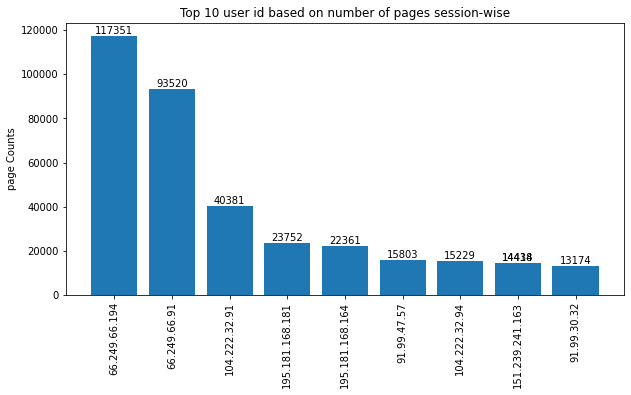

In [46]:
# Assuming top_10_users is a DataFrame with columns "Max" and "user_id"
fig, ax = plt.subplots(figsize=(10,5))
bar_container = ax.bar(count_pages_session_10["userid"], count_pages_session_10["page"], align='center')
ax.set(ylabel='page Counts', title='Top 10 user id based on number of pages session-wise')

# Adding labels to the bars
for bar in bar_container:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')
plt.xticks(rotation=90)

plt.show()

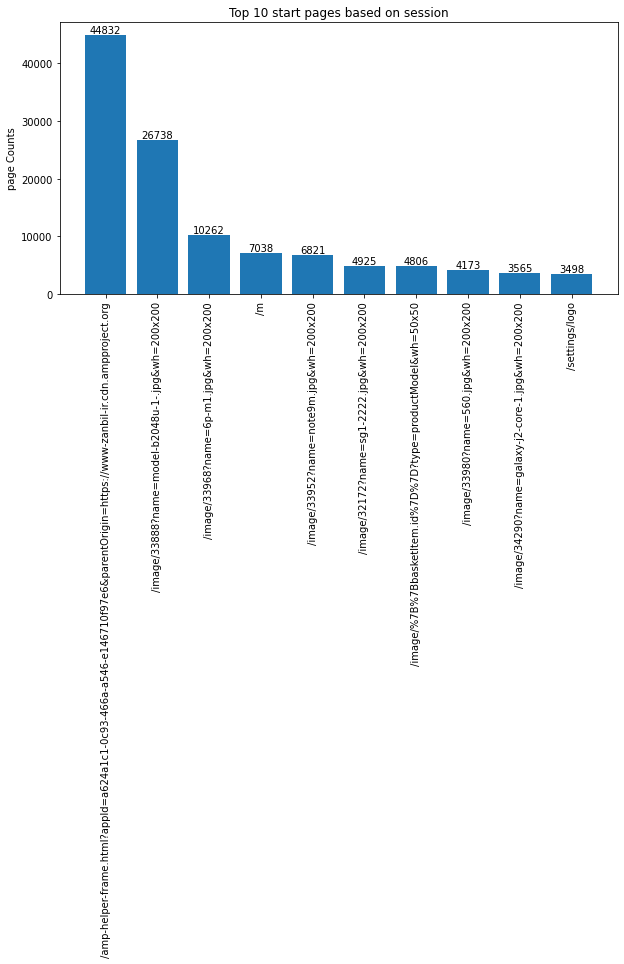

In [47]:
# Assuming top_10_users is a DataFrame with columns "Max" and "user_id"
fig, ax = plt.subplots(figsize=(10,5))
bar_container = ax.bar(session_start_pages_10["index"], session_start_pages_10["page_first"], align='center')
ax.set(ylabel='page Counts', title='Top 10 start pages based on session')

# Adding labels to the bars
for bar in bar_container:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')
plt.xticks(rotation=90)

plt.show()

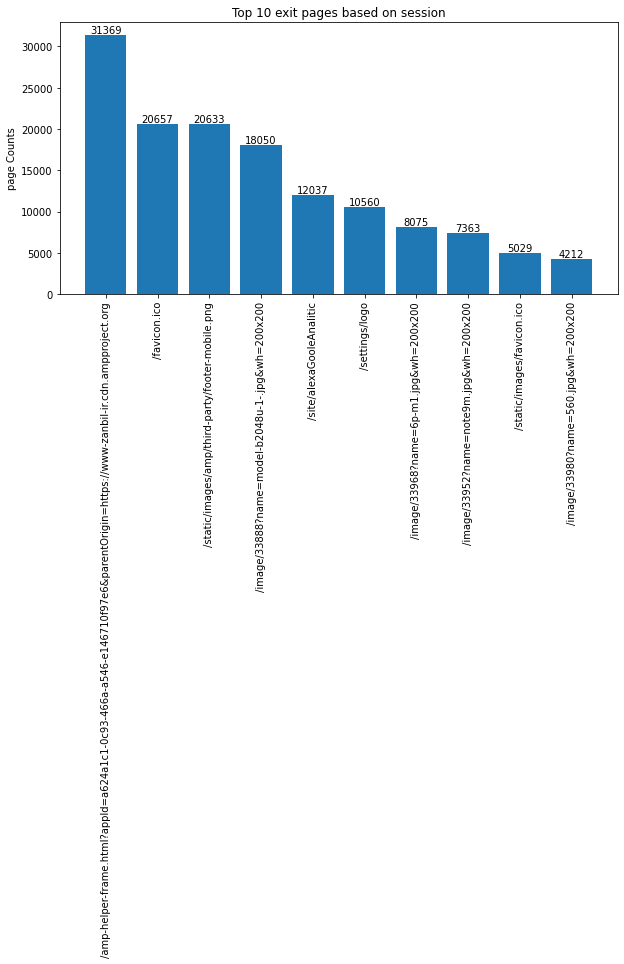

In [48]:
# Assuming top_10_users is a DataFrame with columns "Max" and "user_id"
fig, ax = plt.subplots(figsize=(10,5))
bar_container = ax.bar(session_last_pages_10["index"], session_last_pages_10["page_last"], align='center')
ax.set(ylabel='page Counts', title='Top 10 exit pages based on session')

# Adding labels to the bars
for bar in bar_container:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')
plt.xticks(rotation=90)

plt.show()

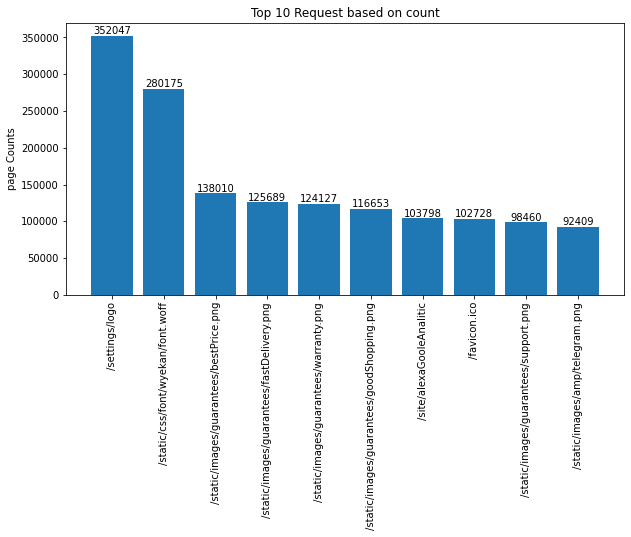

In [49]:
# Assuming top_10_users is a DataFrame with columns "Max" and "user_id"
fig, ax = plt.subplots(figsize=(10,5))
bar_container = ax.bar(top_10_users_events["index"], top_10_users_events["page"], align='center')
ax.set(ylabel='page Counts', title='Top 10 Request based on count')

# Adding labels to the bars
for bar in bar_container:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')
plt.xticks(rotation=90)

plt.show()

In [55]:
df5.shape

(353332, 4)

Creating  Session Id and time difference column between  two logs . which is actually time spend on pages 

Session 

This actually made to the subsequent pages from one page to other page

Here Exit pages are not seesion exit pages it is actually the next  page of logs. using that 0 th session is the first session. Whenver the next session starts the last page is the exit page for the last session

In [ ]:
df3[df3['userid']]='172.20.2.174'

In [57]:
# Convert 'datetime' column to datetime objects
df5['datetime'] = pd.to_datetime(df5['datetime'])

# Sort the DataFrame by 'client' and 'datetime'
df5 = df5.sort_values(by=['client', 'datetime'])

# Calculate the exit pages for each session
exit_pages = df5.groupby('client')['request'].shift(-1)
df5['exit_page'] = exit_pages

# Fill NaN values in the 'exit_page' column with a default value (e.g., 'No exit page')
df5['exit_page'].fillna('No exit page', inplace=True)

# Print the resulting DataFrame
df5.head()

,client,datetime,request,referer,exit_page
2114873,66.249.66.194,2019-01-22 03:56:18,"/filter/b41,b665,c150%7C%D8%A8%D8%AE%D8%A7%D8%...",-,"/m/filter/b2,p6"
2114884,66.249.66.194,2019-01-22 03:56:20,"/m/filter/b2,p6",-,/m/browse/gas-heater/%D8%A8%D8%AE%D8%A7%D8%B1%...
2114896,66.249.66.194,2019-01-22 03:56:22,/m/browse/gas-heater/%D8%A8%D8%AE%D8%A7%D8%B1%...,-,/m/article/608/%D8%B9%D9%84%D8%AA-%D8%B5%D8%AF...
2114897,66.249.66.194,2019-01-22 03:56:22,/m/article/608/%D8%B9%D9%84%D8%AA-%D8%B5%D8%AF...,-,/product/81900
2114904,66.249.66.194,2019-01-22 03:56:23,/product/81900,-,"/m/filter/b105,b113,b118,b126,b135,b136,b152,b..."


In [58]:
from datetime import datetime, timedelta

# Convert the 'datetime' column to datetime objects and sort the DataFrame by 'datetime'
df5['datetime'] = pd.to_datetime(df5['datetime'])
df5.sort_values(by='datetime', inplace=True)

# Define the threshold for session separation (5 seconds) and minimum session duration (5 minutes)
threshold = timedelta(seconds=600)
min_session_duration = timedelta(minutes=5)

# Create a session ID column
session_id = 1
sessions = []
current_session = None

for index, row in df5.iterrows():
    if current_session is None:
        current_session = {
            'start_time': row['datetime'],
            'requests': [row['request']],
            'session_id': session_id
        }
    else:
        time_diff = row['datetime'] - current_session['start_time']
        if time_diff > threshold:
            if time_diff > min_session_duration:
                sessions.append(current_session)
                session_id += 1
            current_session = {
                'start_time': row['datetime'],
                'requests': [row['request']],
                'session_id': session_id
            }
        else:
            current_session['requests'].append(row['request'])
            current_session['session_id'] = session_id

# Append the last session
if current_session:
    sessions.append(current_session)
# Create a DataFrame for the sessions
session_df = pd.DataFrame(sessions)
# Print the session DataFrame
session_df.head(6)

,start_time,requests,session_id
0,2019-01-22 03:56:18,"[/filter/b41,b665,c150%7C%D8%A8%D8%AE%D8%A7%D8...",1
1,2019-01-22 04:06:19,[/m/article/615/%D8%AF%D8%B1%D9%85%D8%A7%D9%86...,2
2,2019-01-22 04:16:20,[/m/browse/barbeque/%DA%A9%D8%A8%D8%A7%D8%A8-%...,3
3,2019-01-22 04:26:23,"[/m/filter/b103,b105,b113,b135,b136,b143,b148,...",4
4,2019-01-22 04:36:25,"[/m, /product/31540/%D9%87%D9%88%D8%AF-%D8%B4%...",5
5,2019-01-22 04:46:27,"[/m/filter/b1,b103,b126,b135,b151,b183,b185,b1...",6


In [59]:
# Count the frequency of unique exit pages
exit_page_counts = df5['exit_page'].value_counts()
# Print the frequency of unique exit pages
exit_page_counts.head(6)

/m                                          1776
/m/filter/b1,p62                            1687
/m/filter/b2,p65                            1392
/m/filter/b2,p3                             1273
/m/filter/b2,p6                             1110
/m/browse/mixer/%D9%87%D9%85%D8%B2%D9%86    1109
Name: exit_page, dtype: int64

This is actual our session exit pages for a particular client , Because every session has last seession except the 0th session or first session.The Exit page of session will be the last page of precceding session

This code is for Validation purpose only

This the code for time spend on pages by a particular  client  user define function 

Time Spend on Each pages baqsed on single client

In [60]:
# Convert 'datetime' column to datetime objects
df5['datetime'] = pd.to_datetime(df5['datetime'])

# Sort the DataFrame by 'client' and 'datetime'
df5 = df5.sort_values(by=['client', 'datetime'])

# Calculate time spent on each page for each session
df5['time_diff'] = df5.groupby('client')['datetime'].diff()

# Fill NaN values in the 'time_diff' column with zeros for the first page in each session
df5['time_diff'].fillna(pd.Timedelta(seconds=0), inplace=True)

# Iterate over rows and print page/request and time spent
for index, row in df5.iterrows():
    print(f"Page/Request: {row['request']} - Time Spent: {row['time_diff']}")

In [ ]:
# Assuming your DataFrame is named df

# Extract days, hours, minutes, and seconds from time_diff
df5['days'] = df5['time_diff'].dt.days
df5['hours'] = df5['time_diff'].dt.seconds // 3600
df5['minutes'] = (df5['time_diff'].dt.seconds % 3600) // 60
df5['seconds'] = df5['time_diff'].dt.seconds % 60

# Convert each component to seconds and sum them up
df5['time_diff_seconds'] = (df5['days'] * 24 * 60 * 60) + (df5['hours'] * 60 * 60) + (df5['minutes'] * 60) + df5['seconds']

# Drop the intermediate columns if you don't need them anymore
df6 = df5.drop(['days', 'hours', 'minutes', 'seconds','time_diff'], axis=1)
df6.head()

In [57]:
df7=df5

Dropped Request Logo it is browsed by majority of population

In [58]:
df7 = df7[~df7['request'].str.contains('logo')]

Top 10 request for a particular client

In [ ]:
# Filter sessions with non-zero time difference
filtered_df7 = df7[df7['time_diff_seconds'] > 0]

# Check if filtered_df is empty
if not filtered_df7.empty:
    # Group by 'request' and calculate total time spent
    request_time = filtered_df7.groupby('request')['time_diff_seconds'].sum()

    # Sort requests by total time spent in descending order
    top_10_requests = request_time.sort_values(ascending=False).head(10)

    # Plot a bar graph
    plt.figure(figsize=(12, 6))
    top_10_requests.plot(kind='bar', color='pink')
    plt.xlabel('Request')
    plt.ylabel('Total Time Spent (seconds)')
    plt.title('Top 10 Requests Based on Time Spent by individual client')
    plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()
else:
    print("No data to plot.")

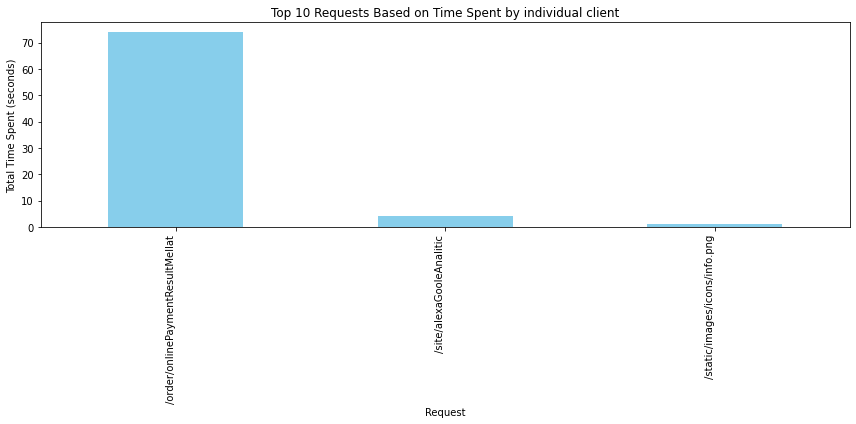

In [66]:
# Filter sessions with non-zero time difference
filtered_df = df6[df6['time_diff_seconds'] > 0]

# Check if filtered_df is empty
if not filtered_df.empty:
    # Group by 'request' and calculate total time spent
    request_time = filtered_df.groupby('request')['time_diff_seconds'].sum()

    # Sort requests by total time spent in descending order
    top_10_requests = request_time.sort_values(ascending=False).head(10)

    # Plot a bar graph
    plt.figure(figsize=(12, 6))
    top_10_requests.plot(kind='bar', color='skyblue')
    plt.xlabel('Request')
    plt.ylabel('Total Time Spent (seconds)')
    plt.title('Top 10 Requests Based on Time Spent by individual client')
    plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()
else:
    print("No data to plot.")

No of Session by client

In [67]:
from datetime import timedelta

df5['datetime'] = pd.to_datetime(df5['datetime'])
# Step 1: Sort the DataFrame by datetime
df5.sort_values(by='datetime', inplace=True)
# Step 2: Calculate time differences
df5['Time_diff'] = df5['datetime'].diff().fillna(pd.Timedelta(seconds=0))
# Step 3: Determine session boundaries
session_timeout = pd.Timedelta(minutes=20)
session_boundaries = df5['Time_diff'].cumsum() >= session_timeout
# Step 4: Count the sessions
num_sessions = session_boundaries.sum()
# Display the number of sessions
print("Number of sessions:", num_sessions)

Number of sessions: 0


Total no of sessions  by overall client

In [26]:
df3.head()

,userid,Timestamp,page,referer,time_diff,session
8968867,1.132.107.223,2019-01-26 02:26:22,/m/article/616/%D8%B9%D9%84%D8%AA-%D8%AE%D9%88...,https://www.google.com/,0 days 00:00:00,0
8968872,1.132.107.223,2019-01-26 02:26:23,/settings/logo,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...,0 days 00:00:01,0
8968875,1.132.107.223,2019-01-26 02:26:24,/amp-helper-frame.html?appId=a624a1c1-0c93-466...,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...,0 days 00:00:01,0
8968885,1.132.107.223,2019-01-26 02:26:25,/static/images/guarantees/bestPrice.png,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...,0 days 00:00:01,0
8968886,1.132.107.223,2019-01-26 02:26:25,/static/images/guarantees/goodShopping.png,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...,0 days 00:00:00,0


Least visited pages

There are many pages which are visited by any client only once 

Least visited pages visited twice for entire dataframe

In [43]:
# Objective: Least Visited Pages (visited at least twice)
visited_counts_all = df3['page'].value_counts()
least_visited_pages_all = visited_counts_all[visited_counts_all >= 2].index.tolist()

# Print the least visited pages in chunks to avoid IOPub data rate limit
chunk_size = 1  # Adjust the chunk size as needed
for i in range(0, len(least_visited_pages_all), chunk_size):
    print("Least Visited Pages (visited at least twice):", least_visited_pages_all[i:i+chunk_size])

Least Visited Pages (visited at least twice): ['/settings/logo']
Least Visited Pages (visited at least twice): ['/site/alexaGooleAnalitic']
Least Visited Pages (visited at least twice): ['/static/css/font/wyekan/font.woff']
Least Visited Pages (visited at least twice): ['/static/images/guarantees/warranty.png']
Least Visited Pages (visited at least twice): ['/static/images/guarantees/goodShopping.png']
Least Visited Pages (visited at least twice): ['/static/images/guarantees/bestPrice.png']
Least Visited Pages (visited at least twice): ['/favicon.ico']
Least Visited Pages (visited at least twice): ['/static/images/guarantees/support.png']
Least Visited Pages (visited at least twice): ['/static/images/guarantees/fastDelivery.png']
Least Visited Pages (visited at least twice): ['/static/images/amp/telegram.png']
Least Visited Pages (visited at least twice): ['/static/images/amp/instagram.png']
Least Visited Pages (visited at least twice): ['/static/images/amp/blog.png']
Least Visited Pag

Least visited pages for one client

In [44]:
# Objective 1: Least Visited Pages
visited_counts = client_data['page'].value_counts()
least_visited_pages = visited_counts[visited_counts == visited_counts.min()].index.tolist()

# Print the least visited pages in chunks to avoid IOPub data rate limit
chunk_size = 1  # Adjust the chunk size as needed
for i in range(0, len(least_visited_pages), chunk_size):
    print("Least Visited Pages:", least_visited_pages[i:i+chunk_size])

Least Visited Pages: ['/product/29443/58877/%D8%B1%DB%8C%D8%B4-%D8%AA%D8%B1%D8%A7%D8%B4-%D9%86%D9%88%D8%B3%D8%A7%D9%86%DB%8C-%D8%A8%D8%B1%D8%A7%D9%88%D9%86-%D9%85%D8%AF%D9%84-3040s']
Least Visited Pages: ['/product/30762/60527/%D8%B1%DB%8C%D8%B4-%D8%AA%D8%B1%D8%A7%D8%B4-%D9%86%D9%88%D8%B3%D8%A7%D9%86%DB%8C-%D8%A8%D8%B1%D8%A7%D9%88%D9%86-%D9%85%D8%AF%D9%84-3050CC']
Least Visited Pages: ['/product/29441/58876/%D8%B1%DB%8C%D8%B4-%D8%AA%D8%B1%D8%A7%D8%B4-%D9%86%D9%88%D8%B3%D8%A7%D9%86%DB%8C-%D8%A8%D8%B1%D8%A7%D9%88%D9%86-%D9%85%D8%AF%D9%84-5040S']


Call to Action

In [27]:
df_all.head(1)

,userid,Timestamp,page,referer
8968867,1.132.107.223,2019-01-26 02:26:22,/m/article/616/%D8%B9%D9%84%D8%AA-%D8%AE%D9%88...,https://www.google.com/


Basis of keyword Call to action pages  identified. As there is no such significant information available. in the search request based on some common keyword identified which may leads to call to action.It also found in others feature column referer as well. It is the entire dataset used as input to find call to action

Overall  call to Action Percentage

Top 10 Request by Call to Action Clients

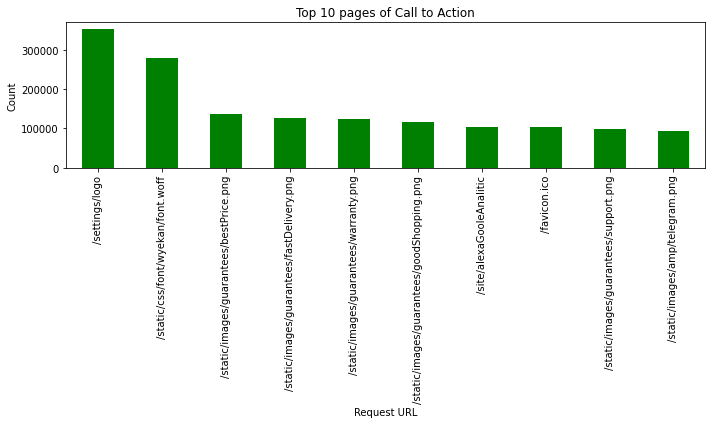

In [28]:
import matplotlib.pyplot as plt

# Group the DataFrame by the 'request' column and count the occurrences of each request
request_counts = df_all['page'].value_counts().head(10)

# Create a bar graph
plt.figure(figsize=(10, 6))
request_counts.plot(kind='bar', color='Green')
plt.title('Top 10 pages of Call to Action')
plt.xlabel('Request URL')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [29]:
# Filter rows based on 'online payment' substring in 'request' columns
CTA = df_all[(df_all['page'].str.contains('onlinePayment|remainingOrder|checkout|basket|buy|pay|completion|shipping|card', case=False, na=False))]

# Create the NCTA DataFrame by excluding rows in CTA
NCTA = df_all[~df_all.index.isin(CTA.index)]
# Display the first 3 rows of the CTA DataFrame
CTA

,userid,Timestamp,page,referer
6934124,1.234.99.77,2019-01-25 04:12:01,/image/%7B%7BbasketItem.id%7D%7D?type=productM...,"https://www.zanbil.ir/filter/b1,p69,stexists"
2623972,10.1.48.115,2019-01-23 08:52:38,/image/%7B%7BbasketItem.id%7D%7D?type=productM...,https://www.zanbil.ir/product/30910
9873239,10.1.52.71,2019-01-26 13:11:02,/image/%7B%7BbasketItem.id%7D%7D?type=productM...,https://www.zanbil.ir/browse/cell-phone
9934848,10.1.52.71,2019-01-26 13:31:34,/static/images/Icon-Buypage/addToZanbil-box.png,https://znbl.ir/static/bundle-bundle_site_head...
597413,10.1.68.25,2019-01-26 18:36:04,/image/%7B%7BbasketItem.id%7D%7D?type=productM...,https://www.zanbil.ir/product/30910
...,...,...,...,...
4813073,99.229.160.69,2019-01-24 06:19:57,/image/%7B%7BbasketItem.id%7D%7D?type=productM...,https://www.zanbil.ir/article/616/%D8%B9%D9%84...
9660428,99.229.160.69,2019-01-26 12:01:00,/image/%7B%7BbasketItem.id%7D%7D?type=productM...,https://www.zanbil.ir/article/616/%D8%B9%D9%84...
2154717,99.243.47.93,2019-01-22 06:32:17,/image/%7B%7BbasketItem.id%7D%7D?type=productM...,https://www.zanbil.ir/product/18939/%D9%82%D9%...
2155733,99.243.47.93,2019-01-22 06:35:47,/image/%7B%7BbasketItem.id%7D%7D?type=productM...,https://www.zanbil.ir/browse/coffee-maker/%D9%...


Top 10 CTA client IP of Call to Action. who actually did transaction

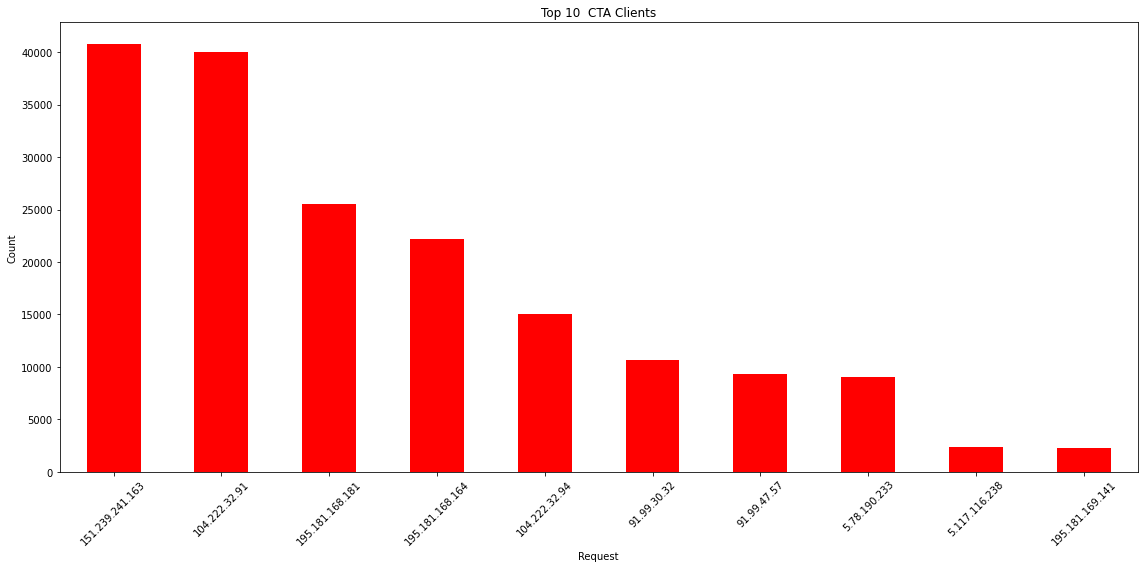

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the DataFrame by the 'request' column and count the occurrences of each request
request_counts = CTA['userid'].value_counts().head(10)

# Create a bar graph
plt.figure(figsize=(16,8))
request_counts.plot(kind='bar', color='red')
plt.title('Top 10  CTA Clients')
plt.xlabel('Request')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [31]:
df_all.head()

,userid,Timestamp,page,referer
8968867,1.132.107.223,2019-01-26 02:26:22,/m/article/616/%D8%B9%D9%84%D8%AA-%D8%AE%D9%88...,https://www.google.com/
8968872,1.132.107.223,2019-01-26 02:26:23,/settings/logo,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...
8968875,1.132.107.223,2019-01-26 02:26:24,/amp-helper-frame.html?appId=a624a1c1-0c93-466...,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...
8968885,1.132.107.223,2019-01-26 02:26:25,/static/images/guarantees/bestPrice.png,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...
8968886,1.132.107.223,2019-01-26 02:26:25,/static/images/guarantees/goodShopping.png,https://www.zanbil.ir/m/article/616/%D8%B9%D9%...


Top 10 clients including  NCTA and CTA Client  

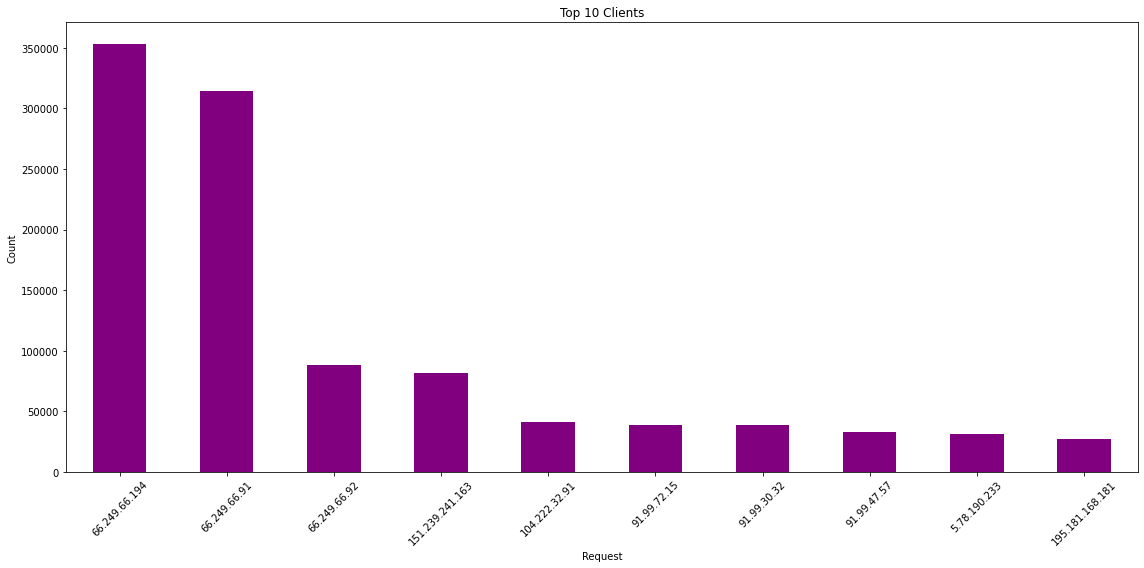

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the DataFrame by the 'request' column and count the occurrences of each request
request_counts_all = df_all['userid'].value_counts().head(10)

# Create a bar graph
plt.figure(figsize=(16,8))
request_counts_all.plot(kind='bar', color='purple')
plt.title('Top 10 Clients')
plt.xlabel('Request')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

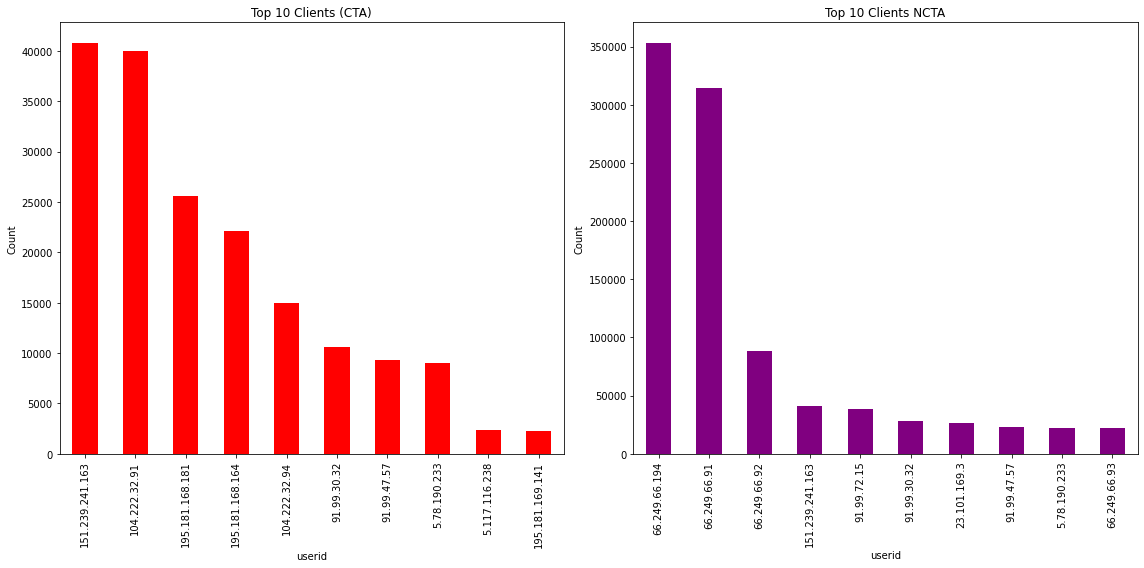

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the DataFrame by the 'client' column and count the occurrences of each client for both dataframes
request_counts = CTA['userid'].value_counts().head(10)
request_counts_all= NCTA['userid'].value_counts().head(10)

# Create a figure with two subplots (side by side)
plt.figure(figsize=(16, 8))

# Plot for CTA dataframe
plt.subplot(1, 2, 1)
request_counts.plot(kind='bar', color='red')
plt.title('Top 10 Clients (CTA)')
plt.xlabel('userid')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Plot for NCTA dataframe
plt.subplot(1, 2, 2)
request_counts_all.plot(kind='bar', color='purple')
plt.title('Top 10 Clients NCTA')
plt.xlabel('userid')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

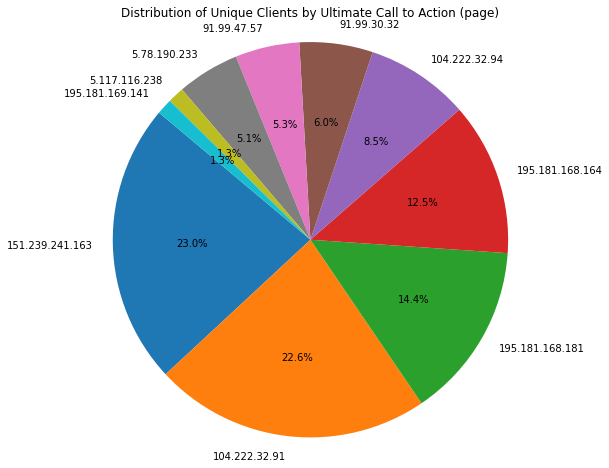

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into a DataFrame called 'df'

# Group by the 'referer' column and count unique clients
referer_counts = CTA['page'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(request_counts, labels=request_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Unique Clients by Ultimate Call to Action (page)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [35]:
# Sort the DataFrame by 'client' and 'datetime'
CTA = CTA.sort_values(by=['userid', 'Timestamp'])

In [36]:
import matplotlib.pyplot as plt
CTA['Timestamp'] = pd.to_datetime(CTA['Timestamp'])
CTA['hour'] = CTA['Timestamp'].dt.hour
hourly_counts = CTA['hour'].value_counts().sort_index()

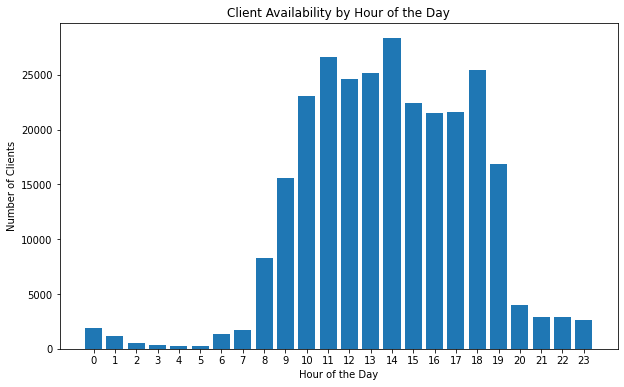

In [37]:
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Clients')
plt.title('Client Availability by Hour of the Day')
plt.xticks(hourly_counts.index)
plt.show()

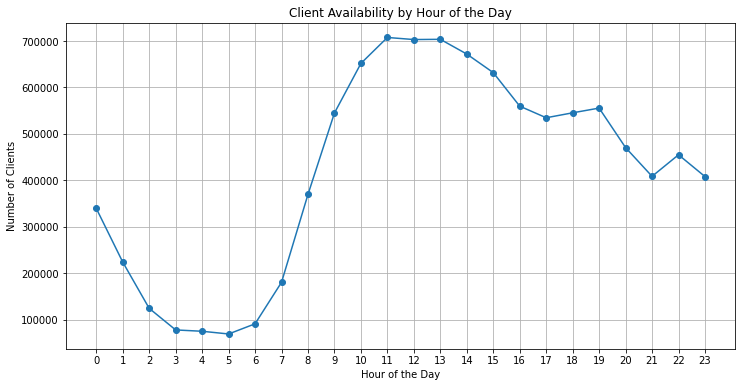

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'c2p' is your DataFrame with datetime and other columns
df_all['Timestamp'] = pd.to_datetime(df_all['Timestamp'])

# Extract the hour from the 'datetime' column and count the number of clients for each hour
df_all['hour'] = df_all['Timestamp'].dt.hour
hourly_counts = df_all.groupby('hour').size()

# Create a line graph
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='line', marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Clients')
plt.title('Client Availability by Hour of the Day')
plt.xticks(hourly_counts.index)
plt.grid(True)
plt.show()

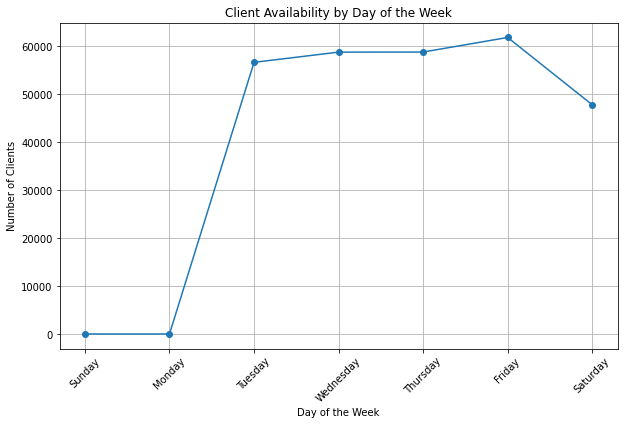

In [39]:
import matplotlib.pyplot as plt

df_all['Timestamp'] = pd.to_datetime(df_all['Timestamp'])

# Extract the day of the week from the 'datetime' column
df_all['day_of_week'] = df_all['Timestamp'].dt.day_name()

# Group by day of the week and count the number of clients for each day
daily_counts = df_all.groupby('day_of_week')['userid'].nunique()

# Define the order of days of the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Reorder the index to match the desired order
daily_counts = daily_counts.reindex(day_order, fill_value=0)

# Create a line graph
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='line', marker='o', linestyle='-')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Clients')
plt.title('Client Availability by Day of the Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [71]:
import pandas as pd

# Sample data for the first dataframe
data1 = {'page_id': range(1, 6), 'request': ['request1', 'request2', 'request3', 'request4', 'request5']}
df1 = pd.DataFrame(data1)

# Sample data for the second dataframe (starting with a different page_id range)
data2 = {'page_id': range(6, 11), 'request': ['request6', 'request7', 'request8', 'request9', 'request10']}
df2 = pd.DataFrame(data2)

# Merge the dataframes using concat
merged_df = pd.concat([df1, df2], ignore_index=True)

# Check if there are any duplicate page_ids in the merged dataframe
while merged_df['page_id'].duplicated().any():
    # Update the page_ids in the second dataframe to ensure they are different
    df2['page_id'] = df2['page_id'] + (max(df1['page_id']) - min(df1['page_id']) + 1)

# Merge the dataframes again to include the updated page_ids
merged_df = pd.concat([df1, df2], ignore_index=True)

# Print the merged dataframe
print(merged_df)

   page_id    request
0        1   request1
1        2   request2
2        3   request3
3        4   request4
4        5   request5
5        6   request6
6        7   request7
7        8   request8
8        9   request9
9       10  request10


In [72]:
# Assign unique page IDs within each dataframe
CTA['page_id'] = range(1, len(CTA) + 1)
NCTA['page_id'] = range(len(CTA) + 1, len(CTA) + 1 + len(NCTA))

# Merge the two dataframes
merged_df = pd.concat([CTA, NCTA], ignore_index=True)
# Print the merged dataframe
merged_df.head(10)

<ipython-input-72-afe27bd77fde>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NCTA['page_id'] = range(len(CTA) + 1, len(CTA) + 1 + len(NCTA))


,userid,Timestamp,page,referer,time_diff,time_spent_on_page,session,session_counter,hour,page_id
0,104.194.24.237,2019-01-22 12:40:34,/order/onlinePayment,https://www.zanbil.ir/order/completionAndRemai...,0.0,NaN,0,0,12.0,1
1,104.194.24.237,2019-01-22 12:41:51,/order/onlinePaymentResultMellat,https://bpm.shaparak.ir/pgwchannel/successRece...,77.0,74.0,0,0,12.0,2
2,104.194.24.43,2019-01-22 12:40:12,/basket/add/56389?mobile=1&addedValues=,https://www.zanbil.ir/m/product/27797/56389/%D...,182.0,45.0,0,0,12.0,3
3,104.194.24.43,2019-01-22 12:40:13,/basket/view,https://www.zanbil.ir/m/product/27797/56389/%D...,183.0,1.0,0,0,12.0,4
4,104.194.24.43,2019-01-22 12:40:33,/basket/checkout,https://www.zanbil.ir/basket/view,203.0,17.0,0,0,12.0,5
5,104.222.32.94,2019-01-22 12:38:28,/rapidGrails/jsonList?maxColumns=16&domainClas...,https://www.zanbil.ir/orderAdministration/console,205.0,NaN,0,0,12.0,6
6,104.222.32.94,2019-01-22 12:38:29,/rapidGrails/jsonList?maxColumns=16&domainClas...,https://www.zanbil.ir/orderAdministration/cons...,206.0,1.0,0,0,12.0,7
7,104.222.32.94,2019-01-22 12:38:30,/rapidGrails/jsonList?maxColumns=16&domainClas...,https://www.zanbil.ir/orderAdministration/cons...,207.0,1.0,0,0,12.0,8
8,104.222.32.94,2019-01-22 12:38:33,/rapidGrails/jsonList?maxColumns=16&domainClas...,https://www.zanbil.ir/orderAdministration/cons...,210.0,3.0,0,0,12.0,9
9,104.222.32.94,2019-01-22 12:38:41,/orderAdministration/list/Search,https://www.zanbil.ir/orderAdministration/cons...,218.0,8.0,0,0,12.0,10


In [73]:
import pandas as pd
# Assuming your DataFrame is named 'df'
# Sort the DataFrame by the 'datetime' column
merged_df['Timestamp'] = pd.to_datetime(merged_df['Timestamp'])  # Convert 'datetime' column to datetime type if it's not already
merged_df = merged_df.sort_values(by='Timestamp')
merged_df.head()

,userid,Timestamp,page,referer,time_diff,time_spent_on_page,session,session_counter,hour,page_id
8603,85.9.73.119,2019-01-22 12:38:27,/static/images/checked.png,https://znbl.ir/static/bundle-bundle_site_head...,13105.0,0.0,0,0,NaN,8604
5699,5.213.165.47,2019-01-22 12:38:27,/settings/logo,https://www.zanbil.ir/m/filter/p9%2Ct454?name=...,8940.0,NaN,0,0,NaN,5700
7098,77.245.233.52,2019-01-22 12:38:27,/image/11082/productType/240x180,https://www.zanbil.ir/browse/sports/%D8%AA%D8%...,11636.0,NaN,0,0,NaN,7099
7099,77.245.233.52,2019-01-22 12:38:27,/image/851/mainSlide,https://www.zanbil.ir/browse/sports/%D8%AA%D8%...,11636.0,0.0,0,0,NaN,7100
7100,77.245.233.52,2019-01-22 12:38:27,/image/848/mainSlide,https://www.zanbil.ir/browse/sports/%D8%AA%D8%...,11636.0,0.0,0,0,NaN,7101


In [74]:
# Create a mapping of unique requests to unique integers
request_to_id = {}
id_to_request = {}
next_id = 1  # Start with 1 as the first unique integer

for request in CTA['Timestamp']:
    if request not in request_to_id:
        request_to_id[request] = next_id
        id_to_request[next_id] = request
        next_id += 1

# Transform the 'request' column to page IDs
CTA['page_id'] = CTA['page'].map(request_to_id)

# Print the DataFrame with the 'page_id' column
CTA.head()

# To understand which unique number represents a unique request, you can use id_to_request
for page_id, request in id_to_request.items():
    print(f"Page ID {page_id} represents request: {request}")

Page ID 1 represents request: 2019-01-22 12:40:34
Page ID 2 represents request: 2019-01-22 12:41:51
Page ID 3 represents request: 2019-01-22 12:40:12
Page ID 4 represents request: 2019-01-22 12:40:13
Page ID 5 represents request: 2019-01-22 12:40:33
Page ID 6 represents request: 2019-01-22 12:38:28
Page ID 7 represents request: 2019-01-22 12:38:29
Page ID 8 represents request: 2019-01-22 12:38:30
Page ID 9 represents request: 2019-01-22 12:38:33
Page ID 10 represents request: 2019-01-22 12:38:41
Page ID 11 represents request: 2019-01-22 12:38:47
Page ID 12 represents request: 2019-01-22 12:38:53
Page ID 13 represents request: 2019-01-22 12:38:54
Page ID 14 represents request: 2019-01-22 12:38:57
Page ID 15 represents request: 2019-01-22 12:39:00
Page ID 16 represents request: 2019-01-22 12:39:01
Page ID 17 represents request: 2019-01-22 12:39:05
Page ID 18 represents request: 2019-01-22 12:39:19
Page ID 19 represents request: 2019-01-22 12:39:21
Page ID 20 represents request: 2019-01-2

In [75]:
# Assuming you already have the 'request_to_id' mapping from the previous example

# Get user input for page_id
user_input = input("Enter a page_id: ")

# Convert the user input to an integer
try:
    page_id = int(user_input)
except ValueError:
    print("Invalid input. Please enter a valid page_id.")
    exit()

# Check if the page_id exists in the mapping
if page_id in request_to_id:
    request = id_to_request[page_id]
    print(f"The request associated with page_id {page_id} is: {request}")
else:
    print(f"No request found for page_id {page_id}")

No request found for page_id 4667


Sequences Detection

In [76]:
# Create a dictionary to map unique pages to numerical IDs
unique_pages = df3['page'].unique()
page_to_id = {page: idx for idx, page in enumerate(unique_pages)}
id_to_page = {idx: page for page, idx in page_to_id.items()}

In [77]:
# Replace HTTP requests with numerical IDs
df3['page_id'] = df3['page'].apply(lambda x: page_to_id[x])

In [78]:
# Sort the data by IP address and timestamp
df3 = df3.sort_values(by=['userid', 'Timestamp'])

In [79]:
# Create sequences of page IDs for each IP address
sequences = df3.groupby('userid')['page_id'].apply(list)

In [80]:
sequences

userid
10.65.253.5                                                     [0]
104.194.24.237                                [1, 2, 3, 4, 5, 3, 4]
104.194.24.43     [6, 3, 7, 8, 9, 10, 11, 12, 3, 13, 14, 15, 16,...
104.222.32.94     [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 3...
104.248.18.193    [69, 3, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79...
                                        ...                        
94.183.37.129     [4636, 198, 195, 197, 414, 350, 199, 944, 425,...
94.184.237.187                                                [502]
94.74.149.39      [4652, 4652, 4652, 3, 4653, 4654, 417, 4655, 4...
95.174.64.190                                                 [264]
95.216.95.200                                    [4664, 4665, 4666]
Name: page_id, Length: 378, dtype: object

In [81]:
df_33=pd.DataFrame(sequences)
df_33.head()

,page_id
userid,
10.65.253.5,[0]
104.194.24.237,"[1, 2, 3, 4, 5, 3, 4]"
104.194.24.43,"[6, 3, 7, 8, 9, 10, 11, 12, 3, 13, 14, 15, 16,..."
104.222.32.94,"[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 3..."
104.248.18.193,"[69, 3, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79..."


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import advertools as adv

In [27]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster

In [28]:
# Read the CSV file into a DataFrame
df = pd.read_csv("C:\\Users\\SAPTARSHI BHATTACHAR\\Desktop\\Common_datafile.csv")

In [29]:
df=df.drop(['userid'], axis=1)

In [30]:
df.rename(columns={'request':'event','datetime':'timestamp','client':'user_id'},inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     10000 non-null  object
 1   timestamp   10000 non-null  object
 2   method      10000 non-null  object
 3   event       10000 non-null  object
 4   status      10000 non-null  int64 
 5   size        10000 non-null  int64 
 6   referer     10000 non-null  object
 7   user_agent  10000 non-null  object
dtypes: int64(2), object(6)
memory usage: 625.1+ KB


In [32]:
df = df.sort_values(by=['event'], axis=0, ascending=True)

In [33]:
# Drop rows where either 'request' or 'referer' column has the value '/'
df = df[(df['event'] != '/')] #& (df['referer'] != '/')]
# Display the filtered DataFrame
# Drop rows where either 'request' or 'referer' column has the value '/'
df = df[(df['event'] != '-')] #& (df['referer'] != '-')]
# Display the filtered DataFrame

In [34]:
df['timestamp'] = pd.to_datetime(df['timestamp'],format='%d/%b/%Y:%H:%M:%S %z') # converting a datetime string like '%d/%b/%Y:%H:%M:%S %z'
df['timestamp'] = df['timestamp'].dt.strftime('%d/%b/%Y:%H:%M:%S') #changing the format
df['timestamp'] = pd.to_datetime(df['timestamp'],format='%d/%b/%Y:%H:%M:%S') # converting a datetime string like '%d/%b/%Y:%H:%M:%S'

In [35]:
df = df.sort_values(by=['user_id','timestamp'], axis=0, ascending=True) #sorting the user id(ips) based on timestamp

In [36]:
df["time_diff"]=df.groupby("user_id")['timestamp'].diff().fillna(pd.Timedelta(0))

In [37]:
df.head(2)

,user_id,timestamp,method,event,status,size,referer,user_agent,time_diff
262,10.65.253.5,2019-01-22 12:38:33,GET,/static/images/favicon.ico,200,152,-,Mozilla/5.0 (Windows NT 6.3; Win64; x64; Tride...,0 days
6238,104.194.24.237,2019-01-22 12:40:34,POST,/order/onlinePayment,200,33390,https://www.zanbil.ir/order/completionAndRemai...,Mozilla/5.0 (Windows NT 10.0; rv:64.0) Gecko/2...,0 days


In [38]:
session_duration = 0
session_count = 0
current_user_id = None
sessions = []

for index, row in df.iterrows():
    if current_user_id != row['user_id']:
        current_user_id = row['user_id']
        session_duration = 0
        session_count = 0

    session_duration += row['time_diff'].total_seconds()

    if row['time_diff'].total_seconds() > 600:  # Compare time_diff with 5 seconds
        session_count += 1
        session_duration = 0

    sessions.append(session_count)

df['session'] = sessions

In [39]:
df.head(2)

,user_id,timestamp,method,event,status,size,referer,user_agent,time_diff,session
262,10.65.253.5,2019-01-22 12:38:33,GET,/static/images/favicon.ico,200,152,-,Mozilla/5.0 (Windows NT 6.3; Win64; x64; Tride...,0 days,0
6238,104.194.24.237,2019-01-22 12:40:34,POST,/order/onlinePayment,200,33390,https://www.zanbil.ir/order/completionAndRemai...,Mozilla/5.0 (Windows NT 10.0; rv:64.0) Gecko/2...,0 days,0


In [40]:
count_pages_session=df.groupby(["user_id", "session"])["event"].value_counts()
count_pages_session=pd.DataFrame(count_pages_session)
count_pages_session=count_pages_session.iloc[:, :-1]
count_pages_session=count_pages_session.reset_index()
new_column_names_1 = ['user_id','session','event']
count_pages_session.columns = new_column_names_1
count_pages_session

,user_id,session,event
0,10.65.253.5,0,/static/images/favicon.ico
1,104.194.24.237,0,/settings/logo
2,104.194.24.237,0,/site/alexaGooleAnalitic
3,104.194.24.237,0,/order/onlinePayment
4,104.194.24.237,0,/order/onlinePaymentResultMellat
...,...,...,...
9322,94.74.149.39,0,/m/filter/p65%2Cb2%2C6313%7C55%20%D8%A7%DB%8C%...
9323,95.174.64.190,0,/amp-helper-frame.html?appId=a624a1c1-0c93-466...
9324,95.216.95.200,0,/product/29441/58876/%D8%B1%DB%8C%D8%B4-%D8%AA...
9325,95.216.95.200,0,/product/29443/58877/%D8%B1%DB%8C%D8%B4-%D8%AA...


In [42]:
count_pages_session_1=df.groupby(["user_id", "session"])["event"].nunique()
count_pages_session_1=count_pages_session_1.reset_index()
count_pages_session_1.columns = new_column_names_1
count_pages_session_1=count_pages_session_1.sort_values(by=['event'], axis=0, ascending=False)
count_pages_session_1

,user_id,session,event
335,84.241.44.42,0,328
134,46.224.113.43,0,322
45,185.120.137.243,0,256
88,2.186.139.252,0,240
120,37.139.14.127,0,210
...,...,...,...
233,5.52.177.76,0,1
235,5.73.135.73,0,1
240,51.38.125.101,0,1
243,54.36.148.100,0,1


In [43]:
count_pages_session_10=count_pages_session_1[:10]
count_pages_session_10

,user_id,session,event
335,84.241.44.42,0,328
134,46.224.113.43,0,322
45,185.120.137.243,0,256
88,2.186.139.252,0,240
120,37.139.14.127,0,210
27,151.239.187.171,0,199
306,77.36.156.16,0,182
91,2.190.144.182,0,178
73,195.181.118.123,0,166
361,91.99.30.32,0,164


In [44]:
result = df.groupby(["user_id",'session']).agg(['first', 'last']).reset_index()
#taking out the first and last page based on session for all the user id(ips) and saving the data into the variable "result"

In [45]:
result=result.loc[:,['user_id','session','event']] #only taking userid,sessions and events for analysis.
new_column_names = ['user_id','session','event_first','event_last']
result.columns = new_column_names
result

,user_id,session,event_first,event_last
0,10.65.253.5,0,/static/images/favicon.ico,/static/images/favicon.ico
1,104.194.24.237,0,/order/onlinePayment,/site/alexaGooleAnalitic
2,104.194.24.43,0,/discountLabel/get/3?type=mobileSmallIcon,/settings/logo
3,104.222.32.94,0,/rapidGrails/jsonList?maxColumns=16&domainClas...,/rapidGrails/jsonList?maxColumns=16&domainClas...
4,104.248.18.193,0,/m/browse/vacuum-cleaner/%D8%AC%D8%A7%D8%B1%D9...,/image/61958/productModel/200x200
...,...,...,...,...
373,94.183.37.129,0,"/filter/b135,p2598,t451",/favicon.ico
374,94.184.237.187,0,/image/38/productType/240x180,/image/38/productType/240x180
375,94.74.149.39,0,/m/filter/p65%2Cb2%2C6313%7C55%20%D8%A7%DB%8C%...,/settings/logo
376,95.174.64.190,0,/amp-helper-frame.html?appId=a624a1c1-0c93-466...,/amp-helper-frame.html?appId=a624a1c1-0c93-466...


In [46]:
# Check the number of columns in the 'result' DataFrame
num_columns_in_dataframe = len(result.columns)

# Define the new column names list with the correct number of elements
new_column_names = [
    'user_id',
    'session',
    'timestamp_first',
    'timestamp_last',
    'event_first',
    'event_last',
    'Time_spent_each_page_first',
    'Time_spent_each_page_last'
]

# Check if the number of elements in the list matches the number of columns
if num_columns_in_dataframe == len(new_column_names):
    result.columns = new_column_names
else:
    print("Number of columns in the DataFrame and new_column_names list do not match.")


Number of columns in the DataFrame and new_column_names list do not match.


In [47]:
session_start_pages=result['event_first'].value_counts()
session_start_pages= pd.DataFrame(session_start_pages)
session_start_pages.reset_index(inplace=True)

In [48]:
session_start_pages_10=session_start_pages[:10]
session_start_pages_10

,index,event_first
0,/amp-helper-frame.html?appId=a624a1c1-0c93-466...,20
1,/image/33888?name=model-b2048u-1-.jpg&wh=200x200,16
2,/image/33968?name=6p-m1.jpg&wh=200x200,8
3,/image/%7B%7BbasketItem.id%7D%7D?type=productM...,7
4,/image/11922?name=11922-1-fw.jpg&wh=200x200,7
5,/favicon.ico,6
6,/settings/logo,6
7,/static/images/filter-loading.gif,4
8,/browse/home-appliances/%D9%84%D9%88%D8%A7%D8%...,4
9,/browse/refrigerator-and-freezer/%DB%8C%D8%AE%...,4


In [49]:
session_last_pages=result['event_last'].value_counts()
session_last_pages= pd.DataFrame(session_last_pages)
session_last_pages.reset_index(inplace=True)

In [50]:
session_last_pages_10=session_last_pages[:10]
session_last_pages_10

,index,event_last
0,/site/alexaGooleAnalitic,33
1,/settings/logo,23
2,/favicon.ico,19
3,/amp-helper-frame.html?appId=a624a1c1-0c93-466...,15
4,/image/34200?name=4000d-1.jpg&wh=200x200,13
5,/static/images/favicon.ico,8
6,/image/33968?name=6p-m1.jpg&wh=200x200,7
7,/image/33888?name=model-b2048u-1-.jpg&wh=200x200,6
8,/static/images/amp/third-party/footer-mobile.png,5
9,/image/get?path=/Image/0yuwdsy2.jpg,4


In [51]:
least_visited_page=df['event'].value_counts()
least_visited_page = pd.DataFrame(least_visited_page)
least_visited_page.reset_index(inplace=True)

In [52]:
sorted_users_eventwise=least_visited_page.sort_values(by=['event'], axis=0, ascending=False)
sorted_users_eventwise

,index,event
0,/settings/logo,297
1,/site/alexaGooleAnalitic,145
2,/static/css/font/wyekan/font.woff,74
3,/static/images/guarantees/goodShopping.png,66
4,/static/images/guarantees/bestPrice.png,66
...,...,...
2374,/image/62670/productModel/200x200,1
2375,/image/64586/productModel/150x150,1
2376,/image/64596/productModel/150x150,1
2377,/image/64603/productModel/150x150,1


In [53]:
top_10_users_events = sorted_users_eventwise[:10]
top_10_users_events

,index,event
0,/settings/logo,297
1,/site/alexaGooleAnalitic,145
2,/static/css/font/wyekan/font.woff,74
3,/static/images/guarantees/goodShopping.png,66
4,/static/images/guarantees/bestPrice.png,66
5,/static/images/guarantees/warranty.png,66
6,/favicon.ico,66
7,/static/images/guarantees/fastDelivery.png,64
8,/static/images/guarantees/support.png,64
9,/static/images/amp/telegram.png,59


In [54]:
Max_session=df.groupby("user_id")['session'].max()
Max_session = pd.DataFrame(Max_session)
Max_session.reset_index(inplace=True)

In [55]:
sorted_users=Max_session.sort_values(by=['session'], axis=0, ascending=False)
sorted_users

,user_id,session
0,10.65.253.5,0
248,54.36.148.139,0
257,54.36.148.201,0
256,54.36.148.198,0
255,54.36.148.197,0
...,...,...
124,37.254.39.233,0
123,37.202.192.191,0
122,37.156.152.133,0
121,37.152.163.59,0


In [56]:
sorted_users=Max_session.sort_values(by=['session'], axis=0, ascending=False)
top_10_users = sorted_users[:10]
top_10_users

,user_id,session
0,10.65.253.5,0
248,54.36.148.139,0
257,54.36.148.201,0
256,54.36.148.198,0
255,54.36.148.197,0
254,54.36.148.188,0
253,54.36.148.185,0
252,54.36.148.163,0
251,54.36.148.16,0
250,54.36.148.148,0


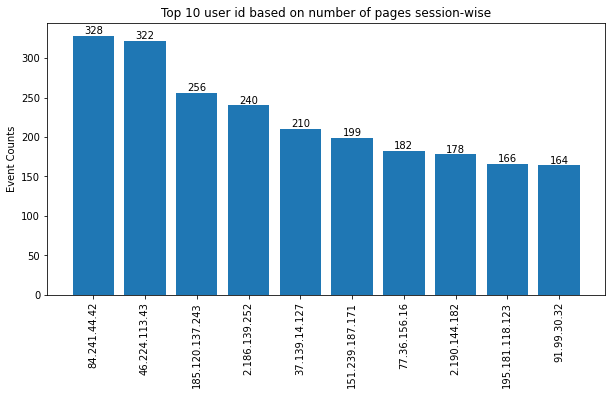

In [113]:
# Assuming top_10_users is a DataFrame with columns "Max" and "user_id"
fig, ax = plt.subplots(figsize=(10,5))
bar_container = ax.bar(count_pages_session_10["user_id"], count_pages_session_10["event"], align='center')
ax.set(ylabel='Event Counts', title='Top 10 user id based on number of pages session-wise')

# Adding labels to the bars
for bar in bar_container:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')
plt.xticks(rotation=90)

plt.show()

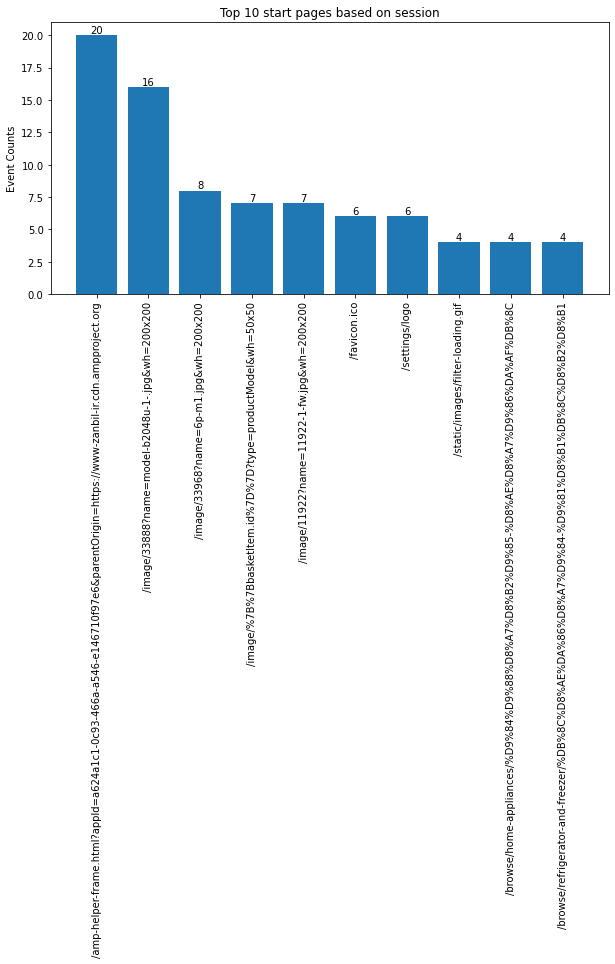

In [114]:
# Assuming top_10_users is a DataFrame with columns "Max" and "user_id"
fig, ax = plt.subplots(figsize=(10,5))
bar_container = ax.bar(session_start_pages_10["index"], session_start_pages_10["event_first"], align='center')
ax.set(ylabel='Event Counts', title='Top 10 start pages based on session')

# Adding labels to the bars
for bar in bar_container:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')
plt.xticks(rotation=90)

plt.show()

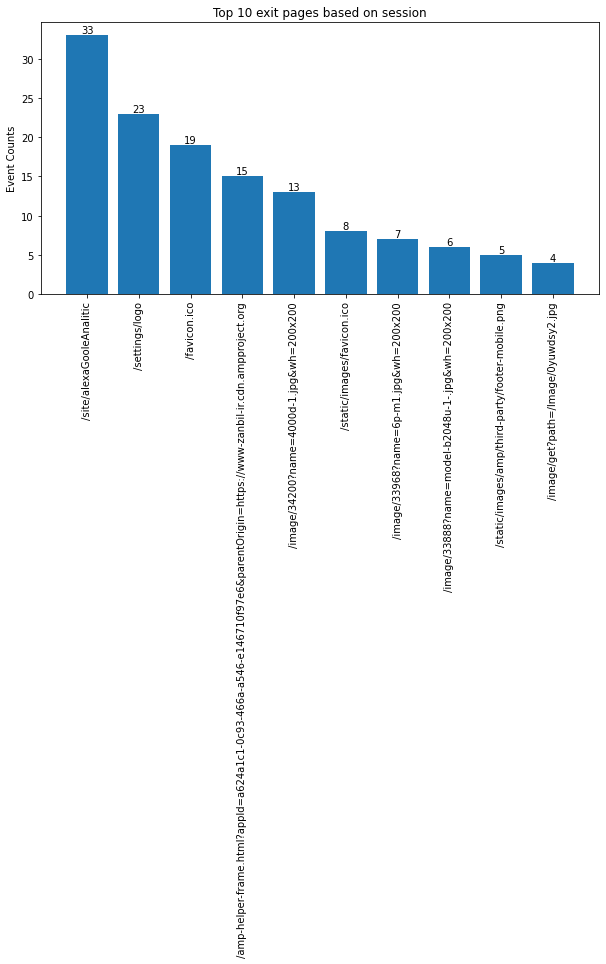

In [115]:
# Assuming top_10_users is a DataFrame with columns "Max" and "user_id"
fig, ax = plt.subplots(figsize=(10,5))
bar_container = ax.bar(session_last_pages_10["index"], session_last_pages_10["event_last"], align='center')
ax.set(ylabel='Event Counts', title='Top 10 exit pages based on session')

# Adding labels to the bars
for bar in bar_container:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')
plt.xticks(rotation=90)

plt.show()

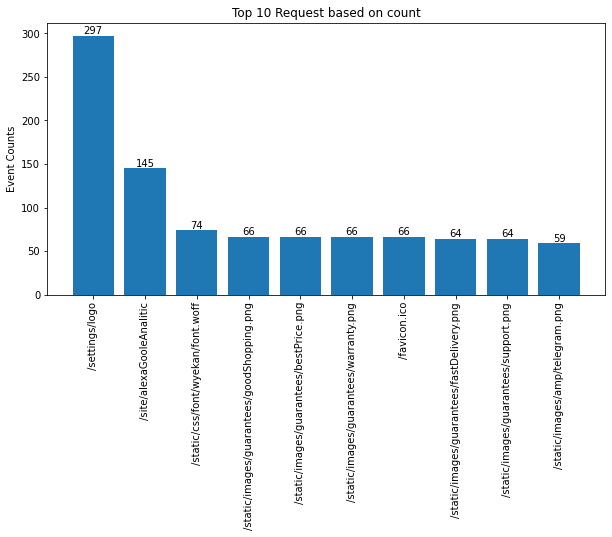

In [116]:
# Assuming top_10_users is a DataFrame with columns "Max" and "user_id"
fig, ax = plt.subplots(figsize=(10,5))
bar_container = ax.bar(top_10_users_events["index"], top_10_users_events["event"], align='center')
ax.set(ylabel='Event Counts', title='Top 10 Request based on count')

# Adding labels to the bars
for bar in bar_container:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')
plt.xticks(rotation=90)

plt.show()

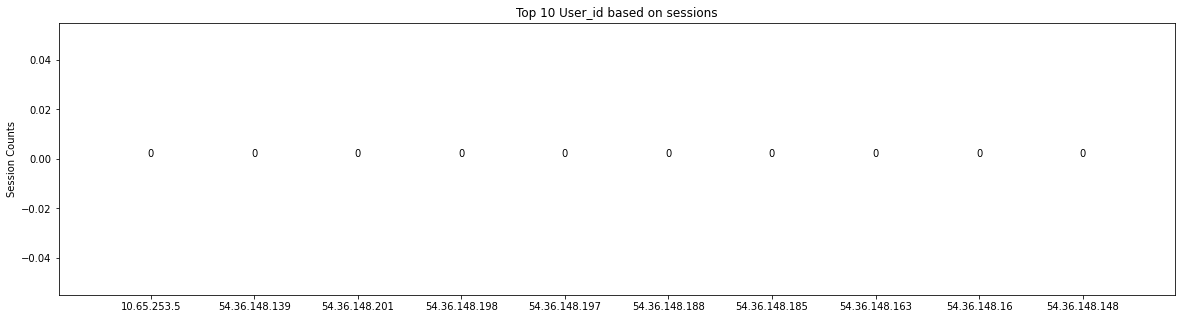

In [117]:
# Assuming top_10_users is a DataFrame with columns "Max" and "user_id"
fig, ax = plt.subplots(figsize=(20,5))
bar_container = ax.bar(top_10_users["user_id"], top_10_users["session"], align='center')
ax.set(ylabel='Session Counts', title='Top 10 User_id based on sessions')

# Adding labels to the bars
for bar in bar_container:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')
plt.show()

Call to Action Pages and No Call to Action pages

call to Action are those who made actually transaction.No call action are those  who visited but did not make any transaction related activity. considerd the person using the page log with respect to keyword.which are typically used before after or during the transaction  purpose. In our case we are not having any significant proof for such transaction. So considered CTA pages were such keywords are present . Rest are visited  but No transaction related key words are present .

In [118]:
# Filter rows based on 'online payment' substring in 'request' columns
CTA = df3[(df3['page'].str.contains('onlinePayment|remainingOrder|checkout|basket|buy|pay|completion|shipping|card', case=False, na=False))]

# Create the NCTA DataFrame by excluding rows in CTA
NCTA = df3[~df3.index.isin(CTA.index)]
# Display the first 3 rows of the CTA DataFrame
CTA

,user_id,timestamp,method,event,status,size,referer,user_agent,time_diff,session
6238,104.194.24.237,2019-01-22 12:40:34,POST,/order/onlinePayment,200,33390,https://www.zanbil.ir/order/completionAndRemai...,Mozilla/5.0 (Windows NT 10.0; rv:64.0) Gecko/2...,0 days 00:00:00,0
9799,104.194.24.237,2019-01-22 12:41:51,POST,/order/onlinePaymentResultMellat,200,34550,https://bpm.shaparak.ir/pgwchannel/successRece...,Mozilla/5.0 (Windows NT 10.0; rv:64.0) Gecko/2...,0 days 00:01:14,0
5113,104.194.24.43,2019-01-22 12:40:12,GET,/basket/add/56389?mobile=1&addedValues=,302,0,https://www.zanbil.ir/m/product/27797/56389/%D...,Mozilla/5.0 (Linux; Android 6.0.1; SM-J700F) A...,0 days 00:00:45,0
5211,104.194.24.43,2019-01-22 12:40:13,GET,/basket/view,200,17944,https://www.zanbil.ir/m/product/27797/56389/%D...,Mozilla/5.0 (Linux; Android 6.0.1; SM-J700F) A...,0 days 00:00:01,0
6182,104.194.24.43,2019-01-22 12:40:33,GET,/basket/checkout,200,18022,https://www.zanbil.ir/basket/view,Mozilla/5.0 (Linux; Android 6.0.1; SM-J700F) A...,0 days 00:00:17,0
...,...,...,...,...,...,...,...,...,...,...
7950,93.119.76.133,2019-01-22 12:41:15,GET,/image/%7B%7BbasketItem.id%7D%7D?type=productM...,200,5,https://www.zanbil.ir/browse/blender/%D9%85%D8...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0 days 00:00:01,0
1525,94.176.54.17,2019-01-22 12:39:07,GET,/static/images/Icon-Buypage/addToZanbil-box.png,200,4011,https://znbl.ir/static/bundle-bundle_site_head...,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:64...,0 days 00:00:00,0
2222,94.183.34.37,2019-01-22 12:39:22,GET,/image/%7B%7BbasketItem.id%7D%7D?type=productM...,200,5,https://www.zanbil.ir/,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,0 days 00:00:01,0
5682,94.183.34.37,2019-01-22 12:40:23,GET,/static/images/Icon-Buypage/addToZanbil-box.png,200,4011,https://znbl.ir/static/bundle-bundle_site_head...,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,0 days 00:00:00,0


In [119]:
percentage_used = (CTA.shape[0] /df3.shape[0]) * 100

print(f"Percentage of shape used by CTA compared to NCTA: {percentage_used:.2f}%")

Percentage of shape used by CTA compared to NCTA: 3.18%


In [120]:
df3['CTA'] = df3['page'].isin(CTA['page']).tolist()
df3['CTA'].value_counts()

False    9651
True      317
Name: CTA, dtype: int64

In [121]:
df3 = df3.sort_values(by=['userid','session'])

# Group by 'user_id' and 'session', then get the cumulative count
df3['row_count'] = df3.groupby(['userid', 'session']).cumcount() + 1

In [122]:
cta_count=df3[df3["page"].isin(CTA['page'])]
cta_count=cta_count.sort_values(by=['userid','Timestamp'])

In [123]:
cta_count

,user_id,timestamp,method,event,status,size,referer,user_agent,time_diff,session,CTA,row_count
6238,104.194.24.237,2019-01-22 12:40:34,POST,/order/onlinePayment,200,33390,https://www.zanbil.ir/order/completionAndRemai...,Mozilla/5.0 (Windows NT 10.0; rv:64.0) Gecko/2...,0 days 00:00:00,0,True,1
9799,104.194.24.237,2019-01-22 12:41:51,POST,/order/onlinePaymentResultMellat,200,34550,https://bpm.shaparak.ir/pgwchannel/successRece...,Mozilla/5.0 (Windows NT 10.0; rv:64.0) Gecko/2...,0 days 00:01:14,0,True,5
5113,104.194.24.43,2019-01-22 12:40:12,GET,/basket/add/56389?mobile=1&addedValues=,302,0,https://www.zanbil.ir/m/product/27797/56389/%D...,Mozilla/5.0 (Linux; Android 6.0.1; SM-J700F) A...,0 days 00:00:45,0,True,24
5211,104.194.24.43,2019-01-22 12:40:13,GET,/basket/view,200,17944,https://www.zanbil.ir/m/product/27797/56389/%D...,Mozilla/5.0 (Linux; Android 6.0.1; SM-J700F) A...,0 days 00:00:01,0,True,25
6182,104.194.24.43,2019-01-22 12:40:33,GET,/basket/checkout,200,18022,https://www.zanbil.ir/basket/view,Mozilla/5.0 (Linux; Android 6.0.1; SM-J700F) A...,0 days 00:00:17,0,True,28
...,...,...,...,...,...,...,...,...,...,...,...,...
7950,93.119.76.133,2019-01-22 12:41:15,GET,/image/%7B%7BbasketItem.id%7D%7D?type=productM...,200,5,https://www.zanbil.ir/browse/blender/%D9%85%D8...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0 days 00:00:01,0,True,2
1525,94.176.54.17,2019-01-22 12:39:07,GET,/static/images/Icon-Buypage/addToZanbil-box.png,200,4011,https://znbl.ir/static/bundle-bundle_site_head...,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:64...,0 days 00:00:00,0,True,21
2222,94.183.34.37,2019-01-22 12:39:22,GET,/image/%7B%7BbasketItem.id%7D%7D?type=productM...,200,5,https://www.zanbil.ir/,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,0 days 00:00:01,0,True,2
5682,94.183.34.37,2019-01-22 12:40:23,GET,/static/images/Icon-Buypage/addToZanbil-box.png,200,4011,https://znbl.ir/static/bundle-bundle_site_head...,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,0 days 00:00:00,0,True,128


In [124]:
print(cta_count.columns)  # Print the column names
print(cta_count.shape)    # Print the shape of the DataFrame

Index(['user_id', 'timestamp', 'method', 'event', 'status', 'size', 'referer',
       'user_agent', 'time_diff', 'session', 'CTA', 'row_count'],
      dtype='object')
(317, 12)


In [125]:
# Assuming "column_name_0", "column_name_9", and "column_name_12" are the actual column names you want to select
cta_count2 = cta_count[['userid', 'session', 'row_count']]
cta_count2.head(2)

,user_id,session,row_count
6238,104.194.24.237,0,1
9799,104.194.24.237,0,5


In [126]:
cta_count2=cta_count.iloc[:,[0, 9, 11]]
cta_count2.head(2)

,user_id,session,row_count
6238,104.194.24.237,0,1
9799,104.194.24.237,0,5


In [127]:
print(cta_count2['row_count'].mean())
print(cta_count2['row_count'].max())
print(cta_count2['row_count'].min())

49.78864353312303
259
1


In [128]:
df3['row_count'].value_counts().sort_index()

1      378
2      246
3      216
4      196
5      183
      ... 
345      1
346      1
347      1
348      1
349      1
Name: row_count, Length: 349, dtype: int64

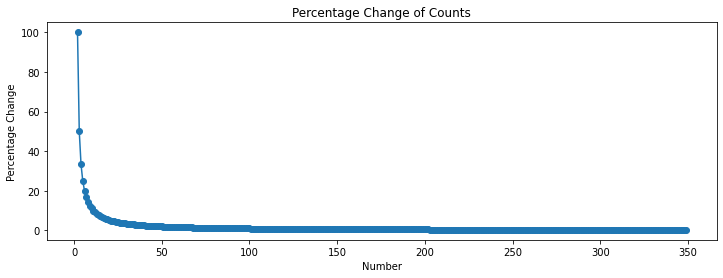

In [129]:
import matplotlib.pyplot as plt

# Your existing code for data processing
counts = df['row_count'].value_counts().sort_index()

x = counts.index
y = counts.values

# Calculate percentage change based on 'x'
percentage_change = ((x[1:] - x[:-1]) / x[:-1]) * 100

# Set the figure size
plt.figure(figsize=(12, 4))  # Adjust the width and height as needed

# Create the plot
plt.plot(x[1:], percentage_change, marker='o')  # Use x[1:] to align with percentage_change
plt.xlabel('Number')
plt.ylabel('Percentage Change')
plt.title('Percentage Change of Counts')
plt.show()

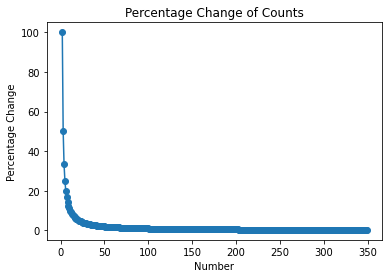

In [130]:
counts = df['row_count'].value_counts().sort_index()

x = counts.index
y = counts.values

# Calculate percentage change based on 'x'
percentage_change = ((x[1:] - x[:-1]) / x[:-1]) * 100

plt.plot(x[1:], percentage_change, marker='o')  # Use x[1:] to align with percentage_change
plt.xlabel('Number')
plt.ylabel('Percentage Change')
plt.title('Percentage Change of Counts')
plt.show()

In [131]:
df2=df.copy()

In [132]:
df2.head(2)

,user_id,timestamp,method,event,status,size,referer,user_agent,time_diff,session,CTA,row_count
262,10.65.253.5,2019-01-22 12:38:33,GET,/static/images/favicon.ico,200,152,-,Mozilla/5.0 (Windows NT 6.3; Win64; x64; Tride...,0 days,0,False,1
6238,104.194.24.237,2019-01-22 12:40:34,POST,/order/onlinePayment,200,33390,https://www.zanbil.ir/order/completionAndRemai...,Mozilla/5.0 (Windows NT 10.0; rv:64.0) Gecko/2...,0 days,0,True,1


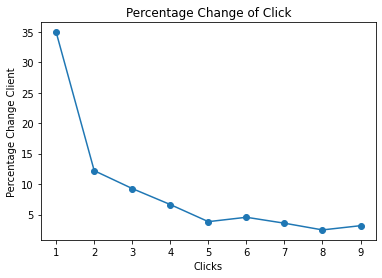

In [133]:
counts = df['row_count'].value_counts().sort_index()

x = counts.index[:10]
y = counts.values[:10]

# Calculate percentage change based on 'x'
percentage_change = ((y[:-1]-y[1:]) / y[:-1]) * 100

plt.plot(x[:-1], percentage_change, marker='o')  # Use x[1:] to align with percentage_change
plt.xlabel('Clicks')
plt.ylabel('Percentage Change Client')
plt.title('Percentage Change of Click')
plt.show()

In [134]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [135]:
df2['event']= label_encoder.fit_transform(df2['event'])

In [136]:
abcd=df2.sort_values(by=['user_id','timestamp'])
sequences = df2.groupby(['user_id', 'session'])['event'].apply(list)
sequences = pd.DataFrame(sequences)
sequences.reset_index(inplace=True)
sequences

,user_id,session,event
0,10.65.253.5,0,[4676]
1,104.194.24.237,0,"[4147, 4603, 4687, 4605, 4149, 4603, 4605]"
2,104.194.24.43,0,"[145, 4603, 1074, 1073, 1899, 2040, 4081, 4141..."
3,104.222.32.94,0,"[4542, 4469, 4489, 4527, 4171, 4183, 4367, 454..."
4,104.248.18.193,0,"[3916, 4603, 4681, 2718, 3151, 4659, 4679, 468..."
...,...,...,...
373,94.183.37.129,0,"[173, 949, 331, 585, 587, 656, 738, 931, 984, ..."
374,94.184.237.187,0,[1729]
375,94.74.149.39,0,"[4067, 4067, 4067, 4603, 2315, 2413, 901, 2139..."
376,95.174.64.190,0,[45]


Retentionneering 

In [137]:
import retentioneering as rete

In [204]:
import pandas as pd
import numpy as np
#import advertools as adv

In [205]:
from retentioneering.eventstream import Eventstream

In [206]:
# Read the CSV file into a DataFrame
df = pd.read_csv("C:\\Users\\SAPTARSHI BHATTACHAR\\Desktop\\Common_datafile.csv")

In [208]:
df.head()

,client,userid,datetime,method,request,status,size,referer,user_agent
0,37.152.163.59,-,22/Jan/2019:12:38:27 +0330,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-7.j...,200,1105,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
1,37.152.163.59,-,22/Jan/2019:12:38:27 +0330,GET,/static/images/zanbil-kharid.png,200,358,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
2,85.9.73.119,-,22/Jan/2019:12:38:27 +0330,GET,/static/images/next.png,200,3045,https://znbl.ir/static/bundle-bundle_site_head...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...
3,37.152.163.59,-,22/Jan/2019:12:38:27 +0330,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-4.j...,200,1457,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
4,85.9.73.119,-,22/Jan/2019:12:38:27 +0330,GET,/static/images/checked.png,200,1083,https://znbl.ir/static/bundle-bundle_site_head...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...


In [209]:
df2=df.drop(['userid'], axis=1)
df2

,client,datetime,method,request,status,size,referer,user_agent
0,37.152.163.59,22/Jan/2019:12:38:27 +0330,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-7.j...,200,1105,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
1,37.152.163.59,22/Jan/2019:12:38:27 +0330,GET,/static/images/zanbil-kharid.png,200,358,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
2,85.9.73.119,22/Jan/2019:12:38:27 +0330,GET,/static/images/next.png,200,3045,https://znbl.ir/static/bundle-bundle_site_head...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...
3,37.152.163.59,22/Jan/2019:12:38:27 +0330,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-4.j...,200,1457,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
4,85.9.73.119,22/Jan/2019:12:38:27 +0330,GET,/static/images/checked.png,200,1083,https://znbl.ir/static/bundle-bundle_site_head...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...
...,...,...,...,...,...,...,...,...
9995,77.36.156.16,22/Jan/2019:12:41:53 +0330,GET,/image/42/brand,200,3470,"https://www.zanbil.ir/filter/p7,b1",Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
9996,151.239.187.171,22/Jan/2019:12:41:53 +0330,GET,/image/64618/productModel/150x150,200,2182,https://www.zanbil.ir/event/Deawoo-Home-Promotion,Mozilla/5.0 (Windows NT 6.3) AppleWebKit/537.3...
9997,77.36.156.16,22/Jan/2019:12:41:53 +0330,GET,/image/54223/productModel/150x150,200,3040,"https://www.zanbil.ir/filter/p7,b1",Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
9998,77.36.156.16,22/Jan/2019:12:41:53 +0330,GET,/image/59821/productModel/150x150,200,2972,"https://www.zanbil.ir/filter/p7,b1",Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...


In [210]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   client      10000 non-null  object
 1   datetime    10000 non-null  object
 2   method      10000 non-null  object
 3   request     10000 non-null  object
 4   status      10000 non-null  int64 
 5   size        10000 non-null  int64 
 6   referer     10000 non-null  object
 7   user_agent  10000 non-null  object
dtypes: int64(2), object(6)
memory usage: 625.1+ KB


In [211]:
df2.rename(columns={'request':'event','datetime':'timestamp','client':'user_id'},inplace=True)
df2

,user_id,timestamp,method,event,status,size,referer,user_agent
0,37.152.163.59,22/Jan/2019:12:38:27 +0330,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-7.j...,200,1105,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
1,37.152.163.59,22/Jan/2019:12:38:27 +0330,GET,/static/images/zanbil-kharid.png,200,358,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
2,85.9.73.119,22/Jan/2019:12:38:27 +0330,GET,/static/images/next.png,200,3045,https://znbl.ir/static/bundle-bundle_site_head...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...
3,37.152.163.59,22/Jan/2019:12:38:27 +0330,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-4.j...,200,1457,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
4,85.9.73.119,22/Jan/2019:12:38:27 +0330,GET,/static/images/checked.png,200,1083,https://znbl.ir/static/bundle-bundle_site_head...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...
...,...,...,...,...,...,...,...,...
9995,77.36.156.16,22/Jan/2019:12:41:53 +0330,GET,/image/42/brand,200,3470,"https://www.zanbil.ir/filter/p7,b1",Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
9996,151.239.187.171,22/Jan/2019:12:41:53 +0330,GET,/image/64618/productModel/150x150,200,2182,https://www.zanbil.ir/event/Deawoo-Home-Promotion,Mozilla/5.0 (Windows NT 6.3) AppleWebKit/537.3...
9997,77.36.156.16,22/Jan/2019:12:41:53 +0330,GET,/image/54223/productModel/150x150,200,3040,"https://www.zanbil.ir/filter/p7,b1",Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
9998,77.36.156.16,22/Jan/2019:12:41:53 +0330,GET,/image/59821/productModel/150x150,200,2972,"https://www.zanbil.ir/filter/p7,b1",Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...


In [212]:
rentention_10=df2.iloc[0:10] # step matrix won't take more then 2^16=65536 rows at one go.

In [213]:
rentention_10['timestamp'] = pd.to_datetime(rentention_10['timestamp'], format='%d/%b/%Y:%H:%M:%S %z')
rentention_10['method'] = rentention_10['method'].astype('category')
rentention_10['status'] = rentention_10['status'].astype('int16')
rentention_10['size'] = rentention_10['size'].astype('int16')
rentention_10['event'] = rentention_10['event'].astype('str')
rentention_10['referer'] = rentention_10['referer'].astype('category')
rentention_10['user_agent'] = rentention_10['user_agent'].astype('category')

<ipython-input-213-62b2be9c3635>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rentention_10['timestamp'] = pd.to_datetime(rentention_10['timestamp'], format='%d/%b/%Y:%H:%M:%S %z')
<ipython-input-213-62b2be9c3635>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rentention_10['method'] = rentention_10['method'].astype('category')
<ipython-input-213-62b2be9c3635>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [214]:
rentention_10

,user_id,timestamp,method,event,status,size,referer,user_agent
0,37.152.163.59,2019-01-22 12:38:27+03:30,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-7.j...,200,1105,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
1,37.152.163.59,2019-01-22 12:38:27+03:30,GET,/static/images/zanbil-kharid.png,200,358,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
2,85.9.73.119,2019-01-22 12:38:27+03:30,GET,/static/images/next.png,200,3045,https://znbl.ir/static/bundle-bundle_site_head...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...
3,37.152.163.59,2019-01-22 12:38:27+03:30,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-4.j...,200,1457,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
4,85.9.73.119,2019-01-22 12:38:27+03:30,GET,/static/images/checked.png,200,1083,https://znbl.ir/static/bundle-bundle_site_head...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...
5,37.152.163.59,2019-01-22 12:38:27+03:30,GET,/static/images/loading.gif,200,7370,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
6,77.245.233.52,2019-01-22 12:38:27+03:30,GET,/image/11082/productType/240x180,200,12458,https://www.zanbil.ir/browse/sports/%D8%AA%D8%...,Mozilla/5.0 (Windows NT 6.1; rv:64.0) Gecko/20...
7,37.27.128.139,2019-01-22 12:38:27+03:30,GET,/browse/Tablet-Arm-Chair/%D8%B5%D9%86%D8%AF%D9...,200,30604,https://www.zanbil.ir/browse/Classroom-Furnitu...,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...
8,77.245.233.52,2019-01-22 12:38:27+03:30,GET,/image/851/mainSlide,200,24323,https://www.zanbil.ir/browse/sports/%D8%AA%D8%...,Mozilla/5.0 (Windows NT 6.1; rv:64.0) Gecko/20...
9,77.245.233.52,2019-01-22 12:38:27+03:30,GET,/image/848/mainSlide,200,27632,https://www.zanbil.ir/browse/sports/%D8%AA%D8%...,Mozilla/5.0 (Windows NT 6.1; rv:64.0) Gecko/20...


In [215]:
rentention_data1=Eventstream(rentention_10)
rentention_data1

In [216]:
rentention_data1.to_dataframe()

,event_id,event_type,event_index,event,timestamp,user_id
0,4422a39f-b56a-4e76-b3c7-e4b30c84bd49,raw,0,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-7.j...,2019-01-22 12:38:27+03:30,37.152.163.59
1,8e133f9a-81dc-49d1-a5bd-597049e5f86d,raw,1,/static/images/zanbil-kharid.png,2019-01-22 12:38:27+03:30,37.152.163.59
2,105ccd97-75d4-4d01-b283-91aeded3e516,raw,2,/static/images/next.png,2019-01-22 12:38:27+03:30,85.9.73.119
3,2ca75355-0141-4a8a-9962-68030a5be456,raw,3,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-4.j...,2019-01-22 12:38:27+03:30,37.152.163.59
4,ccd5728b-95e0-4eb7-b48e-4f67b8b2037f,raw,4,/static/images/checked.png,2019-01-22 12:38:27+03:30,85.9.73.119
5,f2db4936-105e-4f7f-b264-dd16c2491d35,raw,5,/static/images/loading.gif,2019-01-22 12:38:27+03:30,37.152.163.59
6,73926f79-e5ec-4f90-9dc8-f4336fef0762,raw,6,/image/11082/productType/240x180,2019-01-22 12:38:27+03:30,77.245.233.52
7,8968cf40-986d-4239-80e7-26d30cee0df4,raw,7,/browse/Tablet-Arm-Chair/%D8%B5%D9%86%D8%AF%D9...,2019-01-22 12:38:27+03:30,37.27.128.139
8,7ffe9abc-5d64-489b-b0b0-1995f2bfb383,raw,8,/image/851/mainSlide,2019-01-22 12:38:27+03:30,77.245.233.52
9,02188562-092b-4b12-bc22-cba316591d21,raw,9,/image/848/mainSlide,2019-01-22 12:38:27+03:30,77.245.233.52


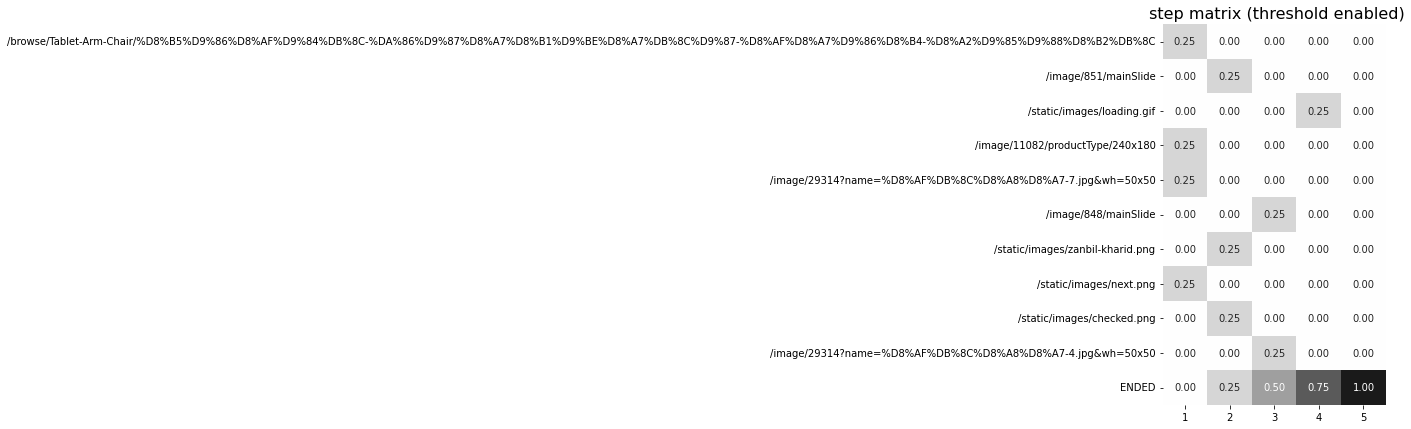

In [217]:
rentention_data1.step_matrix(max_steps=5, threshold=0.04)
#user’s path is shorter than max_steps parameter, then ENDED event is padded to the path so that it becomes exactly of length max_steps.

In [218]:
rentention_data1.step_sankey(max_steps=5)

In [219]:
#rentention_data1.transition_graph()

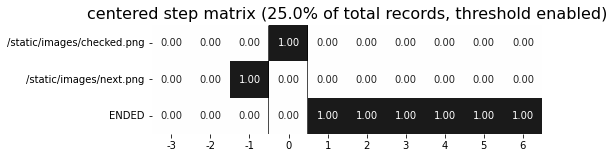

In [220]:
rentention_data1.step_matrix(
    max_steps=10,
    threshold=0.1,
    centered={
        'event': '/static/images/checked.png', #negative means triggred before the selected event, positive means triggred after the selected event
        'left_gap': 3, #how many clicks details we want before the centered event
        'occurrence':1
    }
)